In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.utils.data as data
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
from scipy.io import loadmat

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
%cd /content/drive/MyDrive/Work/BTP Updates/Codes

[Errno 2] No such file or directory: '/content/drive/MyDrive/Work/BTP Updates/Codes'
/home/iiitd/Desktop/rohith


In [306]:
del Xtilde

In [4]:
def make_names_list(range_array):
    l=[]
    for r in range_array:
        l.append(f"SNR_{r}")
    return l

In [5]:
awgn_datapath_1_3="/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Dataset_AWGN_1_3/"
awgn_datapath_1_7="/home/iiitd/Desktop/rohith/Dataset_AWGN_1_7/"
paper_eval_awgn_1_3_datapath="/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Dataset_AWGN_1_3/"

Dataset_AWGN_7="/home/iiitd/Desktop/rohith/Dataset_AWGN_7/"
Dataset_AWGN_6="/home/iiitd/Desktop/rohith/Dataset_AWGN_6/"
Dataset_AWGN_5="/home/iiitd/Desktop/rohith/Dataset_AWGN_5/"
Dataset_AWGN_4="/home/iiitd/Desktop/rohith/Dataset_AWGN_4/"
Dataset_AWGN_3="/home/iiitd/Desktop/rohith/Dataset_AWGN_3/"
Dataset_AWGN_2="/home/iiitd/Desktop/rohith/Dataset_AWGN_2/"
Dataset_AWGN_1="/home/iiitd/Desktop/rohith/Dataset_AWGN_1/"
Dataset_AWGN_1_3_minus20_10="/home/iiitd/Desktop/rohith/Dataset_AWGN_1_3_minus20_10/"
Dataset_RICIAN_1_3_minus20_10="/home/iiitd/Desktop/rohith/Dataset_RICIAN_1_3_minus20_10/"
awgn_datapath_4_7="/home/iiitd/Desktop/rohith/Dataset_AWGN_4_7/"
Dataset_RICIAN_4_7="/home/iiitd/Desktop/rohith/Dataset_RICIAN_4_7/"
Dataset_RAYLEIGH_4_7="/home/iiitd/Desktop/rohith/Dataset_RAYLEIGH_4_7/"
rician_datapath_1_3="/home/iiitd/Desktop/rohith/Dataset_RICIAN_1_3/"
Dataset_RAYLEIGH_1_3_minus20_10="/home/iiitd/Desktop/rohith/Dataset_RAYLEIGH_1_3_minus20_10/"
range_data=np.arange(-20,12,2)
range_data_longer=np.arange(-22,12,2)
range_data_train=np.arange(-10,12,2)

datafiles_train=make_names_list(range_data_train)
dataset_big_awgn="/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/train_Dataset_1_7_awgn/"
datafiles_long=make_names_list(range_data)
datafiles_longer=make_names_list(range_data_longer)
#datafiles=['SNR_-10','SNR_-8','SNR_-6','SNR_-4','SNR_-2','SNR_0','SNR_2','SNR_4','SNR_6','SNR_8','SNR_10','SNR_12','SNR_14','SNR_16','SNR_18','SNR_20']

In [55]:
Dataset_awgn_7="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_7/"
Dataset_awgn_1="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_1/"
Dataset_awgn_2="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_2/"
Dataset_awgn_3="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_3/"
Dataset_awgn_4="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_4/"
Dataset_awgn_5="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_5/"
Dataset_awgn_6="/home/iiitd/Desktop/rohith/Dataset_Code/awgn all sparsity/awgn_6/"


datafiles_single_sparsity = make_names_list(np.arange(-10,12,10))

In [6]:
datafiles_long

['SNR_-20',
 'SNR_-18',
 'SNR_-16',
 'SNR_-14',
 'SNR_-12',
 'SNR_-10',
 'SNR_-8',
 'SNR_-6',
 'SNR_-4',
 'SNR_-2',
 'SNR_0',
 'SNR_2',
 'SNR_4',
 'SNR_6',
 'SNR_8',
 'SNR_10']

In [7]:
#test_split=0.2
# Getting the data combined for train and test of all SNRs
def getCombined(datapath=awgn_datapath_4_7,datafiles=datafiles_long,test_split=0.2,only_test=False):
    if only_test ==True : 
        test_split=1
    Xcomb = None
    X1comb = None
    Ycomb = None
    Mcomb=None
    PhiComb = None
    labelcomb = None
    SNRcomb = None
    for dataset_name in datafiles:
        data_mat = loadmat(datapath+dataset_name)
        tempL = np.array(data_mat['label_status'])  # [:,samples]
        tempY = np.array(data_mat['Y'])  # [:,:,samples]
        tempPhi = np.array(data_mat['phi'])  # [:,:,samples]
        tempL=tempL.reshape(14,-1)
        tempY=tempY.reshape(8,299,-1)
        tempPhi=tempPhi.reshape(8,14,-1)
        size=tempL.shape[1]
        tempL_test=tempL[:,:int(test_split*(size))]
        tempY_test=tempY[:,:,:int(test_split*(size))]
        tempPhi_test=tempPhi[:,:,:int(test_split*(size))]
        
        tempL=tempL[:,int(test_split*(size)):]
        tempY=tempY[:,:,int(test_split*(size)):]
        tempPhi=tempPhi[:,:,int(test_split*(size)):]
        if Ycomb is None:
            Ycomb = tempY
            Ycomb_test=tempY_test
            PhiComb = tempPhi
            PhiComb_test=tempPhi_test
            labelcomb = tempL
            labelcomb_test=tempL_test
        else:
            PhiComb = np.concatenate((PhiComb, tempPhi), axis=-1)
            Ycomb = np.concatenate((Ycomb, tempY), axis=-1)
            labelcomb = np.concatenate((labelcomb, tempL), axis=-1)
            PhiComb_test = np.concatenate((PhiComb_test, tempPhi_test), axis=-1)
            Ycomb_test = np.concatenate((Ycomb_test, tempY_test), axis=-1)
            labelcomb_test = np.concatenate((labelcomb_test, tempL_test), axis=-1)
        print(Ycomb_test.shape,PhiComb_test.shape,labelcomb_test.shape,Ycomb.shape,PhiComb.shape,labelcomb.shape)
        del data_mat
    if only_test ==True:
        return [], [], [], PhiComb_test,Ycomb_test,labelcomb_test#,X1comb,SNRcomb,Mcomb        
    return PhiComb, Ycomb, labelcomb , PhiComb_test,Ycomb_test,labelcomb_test#,X1comb,SNRcomb,Mcomb

In [8]:
Xtilde.shape

NameError: name 'Xtilde' is not defined

In [9]:
# Preprocessing to convert A and Z to X
def Preprocess(PhiComb,Ycomb,labelcomb,permute=True,train=False,max_val=None):
    n=Ycomb.shape[2]
    Xtilde=np.zeros((14,299,n),dtype=complex)
    print(Xtilde.shape)
    for i in range(n):
        a=PhiComb[:,:,i]
        b=Ycomb[:,:,i]
        A=np.linalg.pinv(a)
        Xtilde[:,:,i]=np.matmul(A,b)
        #Xtilde[:,:,i]/=np.absolute(Xtilde[:,:,i])
    
    labelcomb=labelcomb.T
    print(labelcomb.shape)
    Xtilde=Xtilde.transpose((2,0,1))

    Xtilde = np.stack((Xtilde.real, Xtilde.imag),axis=-1)
    max_tilde=np.max(np.absolute(Xtilde))
    print(f"Normalizing constant:{max_tilde}")
    if train:
        
        ##print(max_tilde)
        Xtilde = Xtilde / np.max(np.absolute(Xtilde))
    else:
        Xtilde=Xtilde/max_val
    label=labelcomb
    if(permute==True):
        per=list(np.random.permutation(n))
        Xtilde=Xtilde[per]
        label=labelcomb[per]
    if train:
        return Xtilde,label,max_tilde
    return Xtilde,label

In [406]:
np.max(np.abs(Xtilde_test))

1.0

In [243]:
snr_20_phi.shape

(1400, 8, 14)

In [242]:
start=22400-1400
snr_20_phi=PhiComb_test[:,:,start:].transpose(2,0,1)
snr_20_phi_r=snr_20_phi.real
snr_20_phi_i=snr_20_phi.imag
snr_20_Y=YComb_test[:,:,start:].transpose(2,0,1)
snr_20_y_r=snr_20_Y.real
snr_20_y_i=snr_20_Y.imag
np.savetxt("phi_10_real.txt",snr_20_phi_r.reshape(-1),delimiter="\n")
np.savetxt("phi_10_test_imag.txt",snr_20_phi_i.reshape(-1),delimiter="\n")
np.savetxt("y_10_real.txt",snr_20_y_r.reshape(-1),delimiter="\n")
np.savetxt("y_10_imag.txt",snr_20_y_i.reshape(-1),delimiter="\n")

In [219]:

# For rician

PhiComb_ri, Ycomb_ri, labelcomb_ri,PhiCombri_test,YCombri_test,labelcombri_test= getCombined(Dataset_RICIAN_4_7,datafiles=datafiles_long)
# Preprocess train and test set
Xtilde_ri,label_ri = Preprocess(PhiComb_ri,Ycomb_ri,labelcomb_ri)
Xtilderi_test,labelri_test = Preprocess(PhiCombri_test,YCombri_test,labelcombri_test,permute=False)

#Reshaping for Pytorch Input
Xtilde_ri=Xtilde_ri.reshape(Xtilde_ri.shape[0],2,14,299)
Xtilderi_test=Xtilderi_test.reshape(Xtilderi_test.shape[0],2,14,299)

(8, 299, 1400) (8, 14, 1400) (14, 1400) (8, 299, 5600) (8, 14, 5600) (14, 5600)
(8, 299, 2800) (8, 14, 2800) (14, 2800) (8, 299, 11200) (8, 14, 11200) (14, 11200)
(8, 299, 4200) (8, 14, 4200) (14, 4200) (8, 299, 16800) (8, 14, 16800) (14, 16800)
(8, 299, 5600) (8, 14, 5600) (14, 5600) (8, 299, 22400) (8, 14, 22400) (14, 22400)
(8, 299, 7000) (8, 14, 7000) (14, 7000) (8, 299, 28000) (8, 14, 28000) (14, 28000)
(8, 299, 8400) (8, 14, 8400) (14, 8400) (8, 299, 33600) (8, 14, 33600) (14, 33600)
(8, 299, 9800) (8, 14, 9800) (14, 9800) (8, 299, 39200) (8, 14, 39200) (14, 39200)
(8, 299, 11200) (8, 14, 11200) (14, 11200) (8, 299, 44800) (8, 14, 44800) (14, 44800)
(8, 299, 12600) (8, 14, 12600) (14, 12600) (8, 299, 50400) (8, 14, 50400) (14, 50400)
(8, 299, 14000) (8, 14, 14000) (14, 14000) (8, 299, 56000) (8, 14, 56000) (14, 56000)
(8, 299, 15400) (8, 14, 15400) (14, 15400) (8, 299, 61600) (8, 14, 61600) (14, 61600)
(8, 299, 16800) (8, 14, 16800) (14, 16800) (8, 299, 67200) (8, 14, 67200) (14,

In [230]:

# For rayleigh

PhiComb_ra, Ycomb_ra, labelcomb_ra,PhiCombra_test,YCombra_test,labelcombra_test= getCombined(Dataset_RAYLEIGH_4_7,datafiles=datafiles_long)
# Preprocess train and test set
Xtilde_ra,label_ra = Preprocess(PhiComb_ra,Ycomb_ra,labelcomb_ra)
Xtildera_test,labelra_test = Preprocess(PhiCombra_test,YCombra_test,labelcombra_test,permute=False)

#Reshaping for Pytorch Input
Xtilde_ra=Xtilde_ra.reshape(Xtilde_ra.shape[0],2,14,299)
Xtildera_test=Xtildera_test.reshape(Xtildera_test.shape[0],2,14,299)

(8, 299, 1400) (8, 14, 1400) (14, 1400) (8, 299, 5600) (8, 14, 5600) (14, 5600)
(8, 299, 2800) (8, 14, 2800) (14, 2800) (8, 299, 11200) (8, 14, 11200) (14, 11200)
(8, 299, 4200) (8, 14, 4200) (14, 4200) (8, 299, 16800) (8, 14, 16800) (14, 16800)
(8, 299, 5600) (8, 14, 5600) (14, 5600) (8, 299, 22400) (8, 14, 22400) (14, 22400)
(8, 299, 7000) (8, 14, 7000) (14, 7000) (8, 299, 28000) (8, 14, 28000) (14, 28000)
(8, 299, 8400) (8, 14, 8400) (14, 8400) (8, 299, 33600) (8, 14, 33600) (14, 33600)
(8, 299, 9800) (8, 14, 9800) (14, 9800) (8, 299, 39200) (8, 14, 39200) (14, 39200)
(8, 299, 11200) (8, 14, 11200) (14, 11200) (8, 299, 44800) (8, 14, 44800) (14, 44800)
(8, 299, 12600) (8, 14, 12600) (14, 12600) (8, 299, 50400) (8, 14, 50400) (14, 50400)
(8, 299, 14000) (8, 14, 14000) (14, 14000) (8, 299, 56000) (8, 14, 56000) (14, 56000)
(8, 299, 15400) (8, 14, 15400) (14, 15400) (8, 299, 61600) (8, 14, 61600) (14, 61600)
(8, 299, 16800) (8, 14, 16800) (14, 16800) (8, 299, 67200) (8, 14, 67200) (14,

In [83]:
del Xtilde_test
del label_test
del Xtilde

In [69]:
# for AWGN
#max_val=max_val
PhiComb, Ycomb, labelcomb,PhiComb_test,YComb_test,labelcomb_test= getCombined(datafiles=datafiles_single_sparsity,only_test=True,datapath=Dataset_awgn_3)
Xtilde_test,label_test= Preprocess(PhiComb_test,YComb_test,labelcomb_test,permute=False,train=False,max_val=1139.218)
Xtilde_test=Xtilde_test.reshape(Xtilde_test.shape[0],2,14,299)


(8, 299, 1400) (8, 14, 1400) (14, 1400) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 2800) (8, 14, 2800) (14, 2800) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 4200) (8, 14, 4200) (14, 4200) (8, 299, 0) (8, 14, 0) (14, 0)
(14, 299, 4200)
(4200, 14)
Normalizing constant:395.40282451411036


In [13]:
# for AWGN
#max_val=max_val
PhiComb, Ycomb, labelcomb,PhiComb_test,YComb_test,labelcomb_test= getCombined(datafiles=datafiles_long,only_test=False,datapath=Dataset_AWGN_1)
Xtilde_test,label_test,max_val = Preprocess(PhiComb_test,YComb_test,labelcomb_test,permute=False,train=True)
Xtilde_test=Xtilde_test.reshape(Xtilde_test.shape[0],2,14,299)



(8, 299, 280) (8, 14, 280) (14, 280) (8, 299, 1120) (8, 14, 1120) (14, 1120)
(8, 299, 560) (8, 14, 560) (14, 560) (8, 299, 2240) (8, 14, 2240) (14, 2240)
(8, 299, 840) (8, 14, 840) (14, 840) (8, 299, 3360) (8, 14, 3360) (14, 3360)
(8, 299, 1120) (8, 14, 1120) (14, 1120) (8, 299, 4480) (8, 14, 4480) (14, 4480)
(8, 299, 1400) (8, 14, 1400) (14, 1400) (8, 299, 5600) (8, 14, 5600) (14, 5600)
(8, 299, 1680) (8, 14, 1680) (14, 1680) (8, 299, 6720) (8, 14, 6720) (14, 6720)
(8, 299, 1960) (8, 14, 1960) (14, 1960) (8, 299, 7840) (8, 14, 7840) (14, 7840)
(8, 299, 2240) (8, 14, 2240) (14, 2240) (8, 299, 8960) (8, 14, 8960) (14, 8960)
(8, 299, 2520) (8, 14, 2520) (14, 2520) (8, 299, 10080) (8, 14, 10080) (14, 10080)
(8, 299, 2800) (8, 14, 2800) (14, 2800) (8, 299, 11200) (8, 14, 11200) (14, 11200)
(8, 299, 3080) (8, 14, 3080) (14, 3080) (8, 299, 12320) (8, 14, 12320) (14, 12320)
(8, 299, 3360) (8, 14, 3360) (14, 3360) (8, 299, 13440) (8, 14, 13440) (14, 13440)
(8, 299, 3640) (8, 14, 3640) (14, 364

In [108]:
max_val

1958.6559199244748

In [241]:
# for AWGN
PhiComb, Ycomb, labelcomb,PhiComb_test,YComb_test,labelcomb_test= getCombined(datafiles=datafiles_long,only_test=True,datapath=awgn_datapath_1_3)
# Preprocess train and test set
#Xtilde,label,max_val = Preprocess(PhiComb,Ycomb,labelcomb,train=True)
Xtilde_test,label_test = Preprocess(PhiComb_test,YComb_test,labelcomb_test,permute=False,max_val=max_val)

#Reshaping for Pytorch Input
#Xtilde=Xtilde.reshape(Xtilde.shape[0],2,14,299)
Xtilde_test=Xtilde_test.reshape(Xtilde_test.shape[0],2,14,299)



(8, 299, 1400) (8, 14, 1400) (14, 1400) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 2800) (8, 14, 2800) (14, 2800) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 4200) (8, 14, 4200) (14, 4200) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 5600) (8, 14, 5600) (14, 5600) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 7000) (8, 14, 7000) (14, 7000) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 8400) (8, 14, 8400) (14, 8400) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 9800) (8, 14, 9800) (14, 9800) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 11200) (8, 14, 11200) (14, 11200) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 12600) (8, 14, 12600) (14, 12600) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 14000) (8, 14, 14000) (14, 14000) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 15400) (8, 14, 15400) (14, 15400) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 16800) (8, 14, 16800) (14, 16800) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 18200) (8, 14, 18200) (14, 18200) (8, 299, 0) (8, 14, 0) (14, 0)
(8, 299, 19600) (8, 14, 19600) (14, 19600) (8, 299, 0) (8, 

In [87]:
max_val


1958.6559199244748

In [14]:
class DLWSS(nn.Module):
  def __init__(self):
    super(DLWSS, self).__init__()
    self.conv1=nn.Conv2d(2,256,(1,150))
    self.conv2=nn.Conv2d(256,128,(1,100))
    self.conv3=nn.Conv2d(128,64,(1,51))
    self.fc=nn.Linear(14*1*64,14)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    #print(x.cpu().detach().numpy().dtype)
    x=F.relu(self.conv2(x))
    x=F.relu(self.conv3(x))
    x=torch.flatten(x,1)
    x=torch.sigmoid(self.fc(x))
    return x
   
class DLWSS_quant(nn.Module):
  def __init__(self,fp_model):
    super(DLWSS_quant, self).__init__()
    self.quant=torch.quantization.QuantStub()
    self.fp_model=fp_model
    self.dequant=torch.quantization.DeQuantStub()

  def forward(self,x):
    x=self.quant(x)
    x=self.fp_model(x)
    x=self.dequant(x)
    return x
   

class DLWSS_small(nn.Module):
  def __init__(self):
    super(DLWSS_small, self).__init__()
    self.conv1=nn.Conv2d(2,64,(1,150))
    self.conv2=nn.Conv2d(64,128,(1,100))
    self.conv3=nn.Conv2d(128,32,(1,51))
    self.fc=nn.Linear(14*1*32,14)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    #print(x.cpu().detach().numpy().dtype)
    x=F.relu(self.conv2(x))
    x=F.relu(self.conv3(x))
    x=torch.flatten(x,1)
    x=self.fc(x)
    return x
   

In [36]:

class snr_dataset(Dataset):
  def __init__(self,Xtrain,y_train,transform=None):
    self.X_train=torch.tensor(Xtrain,dtype=torch.float32)
    self.y_train=torch.tensor(y_train)
    self.transform=transform

  def __getitem__(self,id):
    temp=self.X_train[id]
    if(self.transform):
      temp=self.transform(temp)
    return temp,self.y_train[id]

  def __len__(self):
    return len(self.y_train)



class snr_test_dataset(Dataset):
  def __init__(self,Xtest,y_test,transform=None):
    self.Xtest=torch.tensor(Xtest,dtype=torch.float32)
    self.y_test=torch.tensor(y_test)
    self.transform=transform

  def __getitem__(self,id):
    temp=self.Xtest[id]
    if(self.transform):
      temp=self.transform(temp)
    return temp,self.y_test[id]

  def __len__(self):
    return len(self.y_test)

In [29]:
dat=snr_test_dataset(Xtilde_test,label_test)
test_dataloader=DataLoader(dat,num_workers=0)


In [44]:
BATCH_SIZE=32
dat=snr_dataset(Xtilde,label)
#dataloader=DataLoader(dat,shuffle=True,batch_size=128,num_workers=0)
train_data, valid_data = data.random_split(dat,[int(len(dat)*0.9),int(len(dat)*0.1)]) # splitting train into train and val
train_iterator = data.DataLoader(train_data,shuffle = True, batch_size = BATCH_SIZE)
val_iterator = data.DataLoader(valid_data,batch_size = BATCH_SIZE)

In [84]:
del Xtildera_test

In [220]:
dat_ri=snr_test_dataset(Xtilderi_test,labelri_test)
testri_dataloader=DataLoader(dat_ri,num_workers=0)

In [189]:
BATCH_SIZE=32
dat_ri=snr_dataset(Xtilde_ri,label_ri)
#dataloader=DataLoader(dat,shuffle=True,batch_size=128,num_workers=0)
trainri_data, validri_data = data.random_split(dat_ri,[int(len(dat_ri)*0.8),int(len(dat_ri)*0.2)]) # splitting train into train and val
trainri_iterator = data.DataLoader(trainri_data,shuffle = True, batch_size = BATCH_SIZE)
valri_iterator = data.DataLoader(validri_data,batch_size = BATCH_SIZE)

In [231]:
dat_ra=snr_test_dataset(Xtildera_test,labelra_test)
testra_dataloader=DataLoader(dat_ra,num_workers=0)

In [233]:
BATCH_SIZE=32
dat_ra=snr_dataset(Xtilde_ra,label_ra)
#dataloader=DataLoader(dat,shuffle=True,batch_size=128,num_workers=0)
trainra_data, validra_data = data.random_split(dat_ra,[int(len(dat_ra)*0.8),int(len(dat_ra)*0.2)]) # splitting train into train and val
trainra_iterator = data.DataLoader(trainra_data,shuffle = True, batch_size = BATCH_SIZE)
valra_iterator = data.DataLoader(validra_data,batch_size = BATCH_SIZE)

In [18]:

def train(net,optimizer,iterator,criterion):
    #scaler=torch.cuda.amp.GradScaler()
    net.train()
    epoch_loss=0
    for input,label in iterator:
        optimizer.zero_grad() # zero the previous graidents before calculating new ones.
        input=input.to(device)# Sending stuff to GPU
        label=label.to(device,dtype=torch.float32)# byte tensor to float tensor
        #with torch.cuda.amp.autocast():
        #    output=net(input)
        #    loss=criterion(output,label)
        #scaler.scale(loss).backward()
        #scaler.step(optimizer)
        #scaler.update()
        output=net(input)
        loss=criterion(output,label)
        loss.backward()# propagate the loss to update gradients
        optimizer.step() # done to update the weights of all the connections with their stored graidients.
        epoch_loss += loss.item()
        acc=accuracy(output,label)
        # print(running_loss)
    return epoch_loss/len(iterator),acc




In [20]:
def accuracy(output,label):
    output=torch.where(output>0.5,1,0)
    #print(output)
    equal=torch.eq(output,label)
    return equal.sum()/(equal.reshape(-1).shape[0])
  

In [19]:
def test(net,iterator,criterion):
  epoch_loss=0
  with torch.no_grad():
    for i,data in enumerate(iterator):
      input,label=data
      input=input.to(device)# Sending stuff to GPU
      label=label.to(device,dtype=torch.float32)# byte tensor to float tensor
      output=net(input)
      loss=criterion(output,label)
      epoch_loss += loss.item()
      # print(running_loss)
  acc=accuracy(output,label)
  return epoch_loss/len(iterator),acc    


In [45]:
CRITERION=nn.BCELoss() # Binary cross-entropy.
EPOCHS=30
model_try=DLWSS()
OPTIMIZER=torch.optim.Adam(model_try.parameters(),lr=1e-4)
model_try=model_try.to(device)# Sending model parameters to GPU
CRITERION=CRITERION.to(device)
for i in range(EPOCHS):
  print(f"Epoch Number:{i} ")
  train_loss,train_acc=train(model_try,OPTIMIZER,train_iterator,CRITERION)
  val_loss,val_acc=test(model_try,val_iterator,CRITERION)
  print(f"Training Loss={train_loss}. Training Accuracy={train_acc}")
  print(f"Validation Loss={val_loss}. Validation Accuracy={val_acc}")





Epoch Number:0 
Training Loss=0.3691515764525091. Training Accuracy=0.8973214626312256
Validation Loss=0.19188741517563662. Validation Accuracy=0.9017857313156128
Epoch Number:1 
Training Loss=0.18416061570384987. Training Accuracy=0.879464328289032
Validation Loss=0.18298047601555784. Validation Accuracy=0.9084821939468384
Epoch Number:2 
Training Loss=0.17781667157110792. Training Accuracy=0.9397321939468384
Validation Loss=0.17901200521737337. Validation Accuracy=0.9017857313156128
Epoch Number:3 
Training Loss=0.1740520759264904. Training Accuracy=0.8883929252624512
Validation Loss=0.17413062785441677. Validation Accuracy=0.910714328289032
Epoch Number:4 
Training Loss=0.17074399316907618. Training Accuracy=0.9084821939468384
Validation Loss=0.17235461443662645. Validation Accuracy=0.9218750596046448
Epoch Number:5 
Training Loss=0.16803578409193842. Training Accuracy=0.910714328289032
Validation Loss=0.17354453235243758. Validation Accuracy=0.9196429252624512
Epoch Number:6 
Train

In [33]:
def test_all(model,device,directory="Pytorch_test_datasets",n_samples=7000,datafiles=datafiles_long,suf="",datas=16,half=False):
    exact_pred_list=[]
    p_of_det=[]
    band_match_acc=[]
    print(datafiles)
    model.to(device)
    test_samples=n_samples
    for SNR in datafiles:
        load_test=np.loadtxt(directory+"/test_"+str(SNR)+str(suf)+".dat",delimiter=",").reshape((test_samples,2,14,299))[:1400,:,:,:]
        load_label=np.loadtxt(directory+"/test_label_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,14))[:1400,:]
        test_dataloader=DataLoader(snr_test_dataset(load_test,load_label))
        true_1=0
        pred_1=0
        true_1_only1=0
        pred_1_only1=0
        pred_1_bands=0
        true_1_bands=0
        
        for i,data in enumerate(test_dataloader):
            
            inputs,label=data
            #print(inputs.shape)
            inputs=inputs.to(device)
            label=label.to(device)[0]
            if(half):
                inputs=inputs.half()
            ypred=model(inputs)
            pred=torch.where(ypred>0.5,1,0)[0]
            pred=pred.cpu().numpy()
            if(np.sum(np.abs(pred-load_label[i]))==0):
                pred_1+=1
                true_1+=1
            else:
                true_1+=1
            for j in range(14):
                if(pred[j]==1 and load_label[i][j]==1):
                    pred_1_only1+=1
                    true_1_only1+=1
                if(pred[j]==0 and load_label[i][j]==1):
                    true_1_only1+=1
                if(pred[j]==load_label[i][j]):
                    pred_1_bands+=1
                true_1_bands+=1


        exact_acc=pred_1/true_1
        exact_pred_list.append(exact_acc)
        p_of_det.append(pred_1_only1/true_1_only1)
        band_match_acc.append(pred_1_bands/true_1_bands)
        
        #print("Exact Matching Accuracy SNR = "+str(SNR)+" Acc= "+str(pred_1/true_1))
        print(f"Only Ones Accuracy SNR = {str(SNR)} . Accuracy = {str(pred_1_only1/true_1_only1)}")
        print(f"Band match accuracy SNR= {str(SNR)} .Accuracy={str(pred_1_bands/true_1_bands)}")
    return [exact_pred_list,p_of_det,band_match_acc]

In [91]:
inputs.shape

NameError: name 'inputs' is not defined

In [15]:
def write_weights(model_load,filename,dtype=np.float32):
    model_load.cpu()
    w_c1=model_load.conv1.weight.detach().numpy().astype(np.float)
    w_c2=model_load.conv2.weight.detach().numpy().astype(np.float)
    w_c3=model_load.conv3.weight.detach().numpy().astype(np.float)
    w_fc1=model_load.fc.weight.detach().numpy().astype(np.float)
    b_c1=model_load.conv1.bias.detach().numpy().astype(np.float)
    b_c2=model_load.conv2.bias.detach().numpy().astype(np.float)
    b_c3=model_load.conv3.bias.detach().numpy().astype(np.float)
    b_fc1=model_load.fc.bias.detach().numpy().astype(np.float)

    model_dict=[w_c1,b_c1,w_c2,b_c2,w_c3,b_c3,w_fc1,b_fc1]
    flag=0
    for keys in range(len(model_dict)):
        if(flag==0):
          str_1 = open(filename,"w")
          flag=1
        else:
          str_1 = open(filename,"a")
        model_dict[keys]
        if (keys!="bn_0" and keys!="bn_1"):
            print (keys)
            a = np.array(model_dict[keys].reshape((1,np.product(model_dict[keys].shape))),dtype=np.float32)
        a.tofile(str_1)
    


In [71]:
import time
import copy
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
start=time.time()
test_all(model_load,device,half=False,directory="Paper_Evaluation_Datasets/awgn_single_sparsity/test_awgn_3",n_samples=1400,datafiles=datafiles_single_sparsity)
#test_all(half_model,test_dataloader,device,16,True)
end=time.time()
print(end-start)

['SNR_-10', 'SNR_0', 'SNR_10']
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.9583333333333334
Band match accuracy SNR= SNR_-10 .Accuracy=0.8970918367346938
Only Ones Accuracy SNR = SNR_0 . Accuracy = 1.0
Band match accuracy SNR= SNR_0 .Accuracy=0.9905612244897959
Only Ones Accuracy SNR = SNR_10 . Accuracy = 1.0
Band match accuracy SNR= SNR_10 .Accuracy=0.9962755102040817
24.481891632080078


In [245]:
import time
import copy
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
model_load.to("cpu")
half_model=copy.deepcopy(model_load).half()
half_model.to(device)
start=time.time()
test_all(half_model,device,half=True,directory="Paper_Evaluation_Datasets/test_awgn_1_3",n_samples=1400,datafiles=datafiles_long)
#test_all(half_model,test_dataloader,device,16,True)
end=time.time()
print(end-start)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.48251501236312255
Band match accuracy SNR= SNR_-20 .Accuracy=0.6036734693877551
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.4809725158562368
Band match accuracy SNR= SNR_-18 .Accuracy=0.6685714285714286
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.5254297994269341
Band match accuracy SNR= SNR_-16 .Accuracy=0.7394897959183674
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.6742857142857143
Band match accuracy SNR= SNR_-14 .Accuracy=0.8017857142857143
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.8764409221902018
Band match accuracy SNR= SNR_-12 .Accuracy=0.872295918367347
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.9784832451499118
Band match accuracy SNR= SNR_-10 .Accuracy=0.914438775510204
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.999278759466282
Band match acc

In [140]:
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
acc_awgn_4_7=test_all(model_load,device,directory="Paper_Evaluation_Datasets/test_awgn_1_3",n_samples=1400,datafiles=datafiles_long)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.2041681384669728
Band match accuracy SNR= SNR_-20 .Accuracy=0.793826530612245
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.24101479915433405
Band match accuracy SNR= SNR_-18 .Accuracy=0.8130102040816326
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.37965616045845274
Band match accuracy SNR= SNR_-16 .Accuracy=0.8565816326530612
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5539285714285714
Band match accuracy SNR= SNR_-14 .Accuracy=0.9013775510204082
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.7845821325648416
Band match accuracy SNR= SNR_-12 .Accuracy=0.9564285714285714
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.9382716049382716
Band match accuracy SNR= SNR_-10 .Accuracy=0.9868367346938776
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.9895420122610891
Band match 

In [164]:
import matplotlib.pyplot as plt
def plot_weights(weights):
    all_w=[]
    for w in weights:
        for layer_w in torch.flatten(w) :
            all_w.append(layer_w.cpu().detach().numpy())
    #print(np.array(all_w)[0].shape)
    #n,bins,patches=plt.hist(all_w)
    return all_w
        

In [198]:
w_matrix=np.array(w_matrix)

In [199]:
np.max(w_matrix),np.max(w_matrix)

RuntimeError: The size of tensor a (150) must match the size of tensor b (256) at non-singleton dimension 3

In [177]:
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
w_matrix=get_weight_matrix(model_load)
plotted=plot_weights(w_matrix)

In [178]:
u=np.array(plotted).mean()
sigma=np.array(plotted).std()

In [179]:
u,sigma

(-0.0020058367, 0.038405456)

In [170]:
u_dense,sigma_dense=u,sigma


In [176]:
u_sparse,sigma_sparse=u,sigma


In [142]:
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/model_pytorch_4_7_minus20_10_final.pth")
write_weights(model_load,"/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/weights_dense.txt",np.float32)

0
1
2
3
4
5
6
7


In [16]:
import os
def saveTestSet(x_test,y_test,directory="Pytorch_test_datasets",datafiles=datafiles_longer,size=int(0.2*10000)):
    try : 
        os.mkdir(directory)
    except:
        pass
    size=size
    n_snrs=x_test.shape[0]/size
    k=0
    while(k<n_snrs): 
        per_snr=x_test[k*size:(k+1)*size]
        filename=directory+"/test_"+datafiles[k]+".dat"
        np.savetxt(filename,per_snr.reshape((size,14*299*2)),delimiter=",",fmt='%1.10f')
        per_snr=y_test[k*size:(k+1)*size]
        filename=directory+"/test_label_"+datafiles[k]+".dat"
        np.savetxt(filename,per_snr.reshape((size,14)),delimiter=",",fmt='%1.10f')
        print(datafiles[k])
        k=k+1

In [70]:
saveTestSet(Xtilde_test,label_test,directory="Paper_Evaluation_Datasets/awgn_single_sparsity/test_awgn_3",datafiles=datafiles_single_sparsity,size=1400) # Saves Test Data to the disk .

SNR_-10
SNR_0
SNR_10


In [17]:
saveTestSet(Xtilde_test,label_test,directory="Paper_Evaluation_Datasets/test_awgn_1",datafiles=datafiles_long,size=1400) # Saves Test Data to the disk .

SNR_-20
SNR_-18
SNR_-16


ValueError: cannot reshape array of size 2344160 into shape (1400,8372)

In [234]:
saveTestSet(Xtildera_test,labelra_test,directory="Pytorch_Rayleigh_4_7_test_dataset",datafiles=datafiles_long)

SNR_-20
SNR_-18
SNR_-16
SNR_-14
SNR_-12
SNR_-10
SNR_-8
SNR_-6
SNR_-4
SNR_-2
SNR_0
SNR_2
SNR_4
SNR_6
SNR_8
SNR_10


In [222]:
saveTestSet(Xtilderi_test,labelri_test,directory="Pytorch_Rician_4_7_test_dataset",datafiles=datafiles_long)


SNR_-20
SNR_-18
SNR_-16
SNR_-14
SNR_-12
SNR_-10
SNR_-8
SNR_-6
SNR_-4
SNR_-2
SNR_0
SNR_2
SNR_4
SNR_6
SNR_8
SNR_10


In [88]:
del Xtilde_ra

In [ ]:
#start=time.time()
test_all(model,test_dataloader,device)
#end=time.time()
print(end-start)


In [69]:
# Store model
path="trained_dlwss_allsparsity.pth"
torch.save(model_try,path)

In [230]:
model_load=torch.load("model_pytorch.pth")

In [ ]:
class dlwss_inter(DLWSS):

  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)

  def forward(self, x):
    x2=x=F.relu(self.conv1(x))
    x=F.relu(self.conv2(x))
    x=F.relu(self.conv3(x))
    x=torch.flatten(x,1)
    x=F.sigmoid(self.fc(x))
    return x2



In [ ]:
inter=dlwss_inter()

In [ ]:
inter.load_state_dict(model_load.state_dict())

In [ ]:
inter.to(device)
SNR=20
load_test=np.loadtxt("test_"+str(SNR)+".dat",delimiter=",").reshape((1400,2,14,299))
load_label=np.loadtxt("test_label_"+str(SNR)+".dat",delimiter=",").reshape((1400,14))
test_dataloader=DataLoader(snr_test_dataset(load_test,load_label))
true_1=0
pred_1=0
for i,data in enumerate(test_dataloader):
    if(i<1):
        inputs,label=data
        inputs=inputs.to(device)
        label=label.to(device)[0]
        ypred=inter(inputs)
#print(torch.where(ypred>0.5,1,0))
#print(ypred.transpose(3,2,0,1))

In [ ]:
test_all(model,test_dataloader,device)

In [436]:
device

device(type='cuda')

In [232]:
model_2=torch.load("model_pytorch.pth")

In [10]:
model.to("cpu")

DLWSS(
  (conv1): Conv2d(2, 256, kernel_size=(1, 150), stride=(1, 1))
  (conv2): Conv2d(256, 128, kernel_size=(1, 100), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(1, 51), stride=(1, 1))
  (fc): Linear(in_features=896, out_features=14, bias=True)
)

In [249]:
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
acc_awgn_4_7=test_all(model_load,device,directory="Paper_Evaluation_Datasets/test_awgn_4_7",n_samples=2000,datafiles=datafiles_long)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.375
Band match accuracy SNR= SNR_-20 .Accuracy=0.551734693877551
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.33036182485579446
Band match accuracy SNR= SNR_-18 .Accuracy=0.5819387755102041
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.3542331758396118
Band match accuracy SNR= SNR_-16 .Accuracy=0.6160714285714286
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.43669318033641935
Band match accuracy SNR= SNR_-14 .Accuracy=0.6803571428571429
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.5467700258397933
Band match accuracy SNR= SNR_-12 .Accuracy=0.7556632653061225
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.6976957318669809
Band match accuracy SNR= SNR_-10 .Accuracy=0.8470918367346939
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.848005232177894
Band match accuracy SNR= 

In [234]:
acc=acc_awgn_4_7

In [236]:
for d in range(16):
    print(acc[1][d],end=" ")


0.4821617802896503 0.4813248766737139 0.5261461318051576 0.6746428571428571 0.8764409221902018 0.9784832451499118 0.999278759466282 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

In [115]:
model_load=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
acc_awgn_4_7=test_all(model_load,device,directory="Paper_Evaluation_Datasets/test_rician_1_3_train_norm",n_samples=1400,datafiles=datafiles_long)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.35998552821997104
Band match accuracy SNR= SNR_-20 .Accuracy=0.7608673469387756
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.382078853046595
Band match accuracy SNR= SNR_-18 .Accuracy=0.8092857142857143
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.4548749546937296
Band match accuracy SNR= SNR_-16 .Accuracy=0.8651530612244898
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5160244868563197
Band match accuracy SNR= SNR_-14 .Accuracy=0.908469387755102
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.610812746151092
Band match accuracy SNR= SNR_-12 .Accuracy=0.9387755102040817
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.727403673028448
Band match accuracy SNR= SNR_-10 .Accuracy=0.9611224489795919
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.8107142857142857
Band match accu

In [417]:
model_load=torch.load("model_pytorch.pth")

In [120]:
model_load=torch.load("Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
acc_awgn_1=test_all(model_load,device,directory="pytorch_test_awgn_1",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.19714285714285715
Band match accuracy SNR= SNR_-22 .Accuracy=0.825561224489796
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.27071428571428574
Band match accuracy SNR= SNR_-20 .Accuracy=0.8535204081632654
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.45357142857142857
Band match accuracy SNR= SNR_-18 .Accuracy=0.8901530612244898
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.8257142857142857
Band match accuracy SNR= SNR_-16 .Accuracy=0.9259183673469388
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.9857142857142858
Band match accuracy SNR= SNR_-14 .Accuracy=0.9637244897959184
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 1.0
Band match accuracy SNR= SNR_-12 .Accuracy=0.9833163265306123
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 1.0
Band match accuracy SNR= SNR

In [112]:
model_load=torch.load("Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
acc_awgn_2=test_all(model_load,device,directory="pytorch_test_awgn_2",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.1725
Band match accuracy SNR= SNR_-22 .Accuracy=0.7648979591836734
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.1757142857142857
Band match accuracy SNR= SNR_-20 .Accuracy=0.7846938775510204
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.22892857142857143
Band match accuracy SNR= SNR_-18 .Accuracy=0.8166326530612245
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.40535714285714286
Band match accuracy SNR= SNR_-16 .Accuracy=0.8568877551020408
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.6696428571428571
Band match accuracy SNR= SNR_-14 .Accuracy=0.913469387755102
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.88
Band match accuracy SNR= SNR_-12 .Accuracy=0.969234693877551
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.9867857142857143
Band match accuracy SNR= S

In [114]:
model_load=torch.load("Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
acc_awgn_3=test_all(model_load,device,directory="pytorch_test_awgn_3",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.14142857142857143
Band match accuracy SNR= SNR_-22 .Accuracy=0.7244387755102041
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.155
Band match accuracy SNR= SNR_-20 .Accuracy=0.744030612244898
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.17261904761904762
Band match accuracy SNR= SNR_-18 .Accuracy=0.7660204081632653
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.2557142857142857
Band match accuracy SNR= SNR_-16 .Accuracy=0.7979591836734694
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.36428571428571427
Band match accuracy SNR= SNR_-14 .Accuracy=0.8437244897959184
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.4980952380952381
Band match accuracy SNR= SNR_-12 .Accuracy=0.8873979591836735
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.611904761904762
Band match a

In [89]:
model_load=torch.load("Trained_Models/model_pytorch_4_7_minus20_10_final.pth")
acc_awgn_4=test_all(model_load,device,directory="pytorch_test_awgn_4",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.47285714285714286
Band match accuracy SNR= SNR_-22 .Accuracy=0.5320408163265307
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.38535714285714284
Band match accuracy SNR= SNR_-20 .Accuracy=0.5836734693877551
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.3742857142857143
Band match accuracy SNR= SNR_-18 .Accuracy=0.638265306122449
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.48017857142857145
Band match accuracy SNR= SNR_-16 .Accuracy=0.6795918367346939
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.6580357142857143
Band match accuracy SNR= SNR_-14 .Accuracy=0.7497959183673469
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.8046428571428571
Band match accuracy SNR= SNR_-12 .Accuracy=0.8302551020408163
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.934285714285714

In [80]:
model_load=torch.load("Trained_Models/model_pytorch_4_7_minus20_10_final.pth")
acc_awgn_6=test_all(model_load,device,directory="pytorch_test_awgn_6",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.4575
Band match accuracy SNR= SNR_-22 .Accuracy=0.5215816326530612
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.3663095238095238
Band match accuracy SNR= SNR_-20 .Accuracy=0.5493877551020409
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.3423809523809524
Band match accuracy SNR= SNR_-18 .Accuracy=0.5747448979591837
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.4114285714285714
Band match accuracy SNR= SNR_-16 .Accuracy=0.6105612244897959
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5202380952380953
Band match accuracy SNR= SNR_-14 .Accuracy=0.6812244897959183
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.6311904761904762
Band match accuracy SNR= SNR_-12 .Accuracy=0.7633673469387755
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.7620238095238095
Band match a

In [73]:
model_load=torch.load("Trained_Models/model_pytorch_4_7_minus20_10_final.pth")
acc_awgn_5=test_all(model_load,device,directory="pytorch_test_awgn_5",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.46385714285714286
Band match accuracy SNR= SNR_-22 .Accuracy=0.5260714285714285
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.3732857142857143
Band match accuracy SNR= SNR_-20 .Accuracy=0.5671938775510204
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.36428571428571427
Band match accuracy SNR= SNR_-18 .Accuracy=0.6114795918367347
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.44942857142857146
Band match accuracy SNR= SNR_-16 .Accuracy=0.6494897959183673
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5782857142857143
Band match accuracy SNR= SNR_-14 .Accuracy=0.7136734693877551
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.7097142857142857
Band match accuracy SNR= SNR_-12 .Accuracy=0.7955612244897959
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.85042857142857

In [62]:
model_load=torch.load("model_pytorch_4_7_22_10_final.pth")
acc_awgn_7=test_all(model_load,device,directory="pytorch_test_awgn_7",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.4416326530612245
Band match accuracy SNR= SNR_-22 .Accuracy=0.5035204081632653
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.3492857142857143
Band match accuracy SNR= SNR_-20 .Accuracy=0.5143367346938775
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.3426530612244898
Band match accuracy SNR= SNR_-18 .Accuracy=0.5281122448979592
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.3853061224489796
Band match accuracy SNR= SNR_-16 .Accuracy=0.5561224489795918
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.48183673469387756
Band match accuracy SNR= SNR_-14 .Accuracy=0.6244387755102041
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.5938775510204082
Band match accuracy SNR= SNR_-12 .Accuracy=0.7129591836734694
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.7133673469387755

In [435]:
accs=test_all(model_load,test_dataloader,device)

[-10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20]
Exact Matching Accuracy SNR = -10 Acc= 0.6464285714285715
Only Ones Accuracy SNR = -10 . Accuracy = 0.875671802221426
Band match accuracy SNR= -10 .Accuracy=0.9667857142857142
Exact Matching Accuracy SNR = -8 Acc= 0.8778571428571429
Only Ones Accuracy SNR = -8 . Accuracy = 0.9667630057803468
Band match accuracy SNR= -8 .Accuracy=0.9903061224489796
Exact Matching Accuracy SNR = -6 Acc= 0.955
Only Ones Accuracy SNR = -6 . Accuracy = 0.9841381741275996
Band match accuracy SNR= -6 .Accuracy=0.9967857142857143
Exact Matching Accuracy SNR = -4 Acc= 0.9814285714285714
Only Ones Accuracy SNR = -4 . Accuracy = 0.9922425952045134
Band match accuracy SNR= -4 .Accuracy=0.9986734693877551
Exact Matching Accuracy SNR = -2 Acc= 0.9935714285714285
Only Ones Accuracy SNR = -2 . Accuracy = 0.997471098265896
Band match accuracy SNR= -2 .Accuracy=0.9995408163265306
Exact Matching Accuracy SNR = 0 Acc= 0.9978571428571429
Only Ones Accuracy S

In [40]:
model_load=torch.load("model_pytorch_4_7_22_10_final.pth")
acc_awgn_4_7=test_all(model_try,test_dataloader,device,directory="pytorch_test_awgn_4_7",n_samples=10000,datafiles=datafiles_train)

['SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Exact Matching Accuracy SNR = SNR_-10 Acc= 0.0
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.08800880088008801
Band match accuracy SNR= SNR_-10 .Accuracy=0.6440714285714285
Exact Matching Accuracy SNR = SNR_-8 Acc= 0.0
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.04168566998084466
Band match accuracy SNR= SNR_-8 .Accuracy=0.6247857142857143
Exact Matching Accuracy SNR = SNR_-6 Acc= 0.0
Only Ones Accuracy SNR = SNR_-6 . Accuracy = 0.0266497461928934
Band match accuracy SNR= SNR_-6 .Accuracy=0.6165
Exact Matching Accuracy SNR = SNR_-4 Acc= 0.0
Only Ones Accuracy SNR = SNR_-4 . Accuracy = 0.0374263706388763
Band match accuracy SNR= SNR_-4 .Accuracy=0.6206428571428572
Exact Matching Accuracy SNR = SNR_-2 Acc= 0.0005
Only Ones Accuracy SNR = SNR_-2 . Accuracy = 0.06979488110364858
Band match accuracy SNR= SNR_-2 .Accuracy=0.6309642857142858
Exact Matching Accuracy SNR = SNR_0 Acc= 

In [75]:
accra=test_all(model_try,testra_dataloader,device=device,directory="Pytorch_Rayleigh_test_datasets")

[-10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20]
Exact Matching Accuracy SNR = -10 Acc= 0.5764285714285714
Only Ones Accuracy SNR = -10 . Accuracy = 0.8621428571428571
Band match accuracy SNR= -10 .Accuracy=0.9616326530612245
Exact Matching Accuracy SNR = -8 Acc= 0.8314285714285714
Only Ones Accuracy SNR = -8 . Accuracy = 0.9558147755390597
Band match accuracy SNR= -8 .Accuracy=0.9866836734693878
Exact Matching Accuracy SNR = -6 Acc= 0.9357142857142857
Only Ones Accuracy SNR = -6 . Accuracy = 0.9790083242851972
Band match accuracy SNR= -6 .Accuracy=0.9952551020408164
Exact Matching Accuracy SNR = -4 Acc= 0.9585714285714285
Only Ones Accuracy SNR = -4 . Accuracy = 0.9880070546737213
Band match accuracy SNR= -4 .Accuracy=0.9970408163265306
Exact Matching Accuracy SNR = -2 Acc= 0.9614285714285714
Only Ones Accuracy SNR = -2 . Accuracy = 0.995706618962433
Band match accuracy SNR= -2 .Accuracy=0.9972448979591837
Exact Matching Accuracy SNR = 0 Acc= 0.9564285714285714
Only O

In [236]:
model_4_7=torch.load("Trained_Models/model_pytorch_4_7_minus20_10_final.pth")
accra_4_7=test_all(model_4_7,testra_dataloader,device=device,datafiles=datafiles_long,directory="Pytorch_Rayleigh_4_7_test_dataset")

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Exact Matching Accuracy SNR = SNR_-20 Acc= 0.0007142857142857143
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.44695989650711515
Band match accuracy SNR= SNR_-20 .Accuracy=0.5501530612244898
Exact Matching Accuracy SNR = SNR_-18 Acc= 0.0007142857142857143
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.38032744282744285
Band match accuracy SNR= SNR_-18 .Accuracy=0.5831122448979592
Exact Matching Accuracy SNR = SNR_-16 Acc= 0.002857142857142857
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.4005969374513366
Band match accuracy SNR= SNR_-16 .Accuracy=0.6164795918367347
Exact Matching Accuracy SNR = SNR_-14 Acc= 0.007142857142857143
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5088105726872246
Band match accuracy SNR= SNR_-14 .Accuracy=0.6791326530612245
Exact Matching Accuracy SNR = SNR_-12 Acc= 0.03357142857142857
Only On

In [175]:
accra_1_3_minus20_10=test_all(model_try,testra_dataloader,device=device,datafiles=datafiles_long,directory="Pytorch_Rayleigh_1_3_minus20_10_test_datasets")

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Exact Matching Accuracy SNR = SNR_-20 Acc= 0.03214285714285714
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.19878223495702005
Band match accuracy SNR= SNR_-20 .Accuracy=0.7933673469387755
Exact Matching Accuracy SNR = SNR_-18 Acc= 0.08857142857142856
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.26676176890156916
Band match accuracy SNR= SNR_-18 .Accuracy=0.8202551020408163
Exact Matching Accuracy SNR = SNR_-16 Acc= 0.16642857142857143
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.38403451995685006
Band match accuracy SNR= SNR_-16 .Accuracy=0.8528061224489796
Exact Matching Accuracy SNR = SNR_-14 Acc= 0.3335714285714286
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5653748641796451
Band match accuracy SNR= SNR_-14 .Accuracy=0.9052040816326531
Exact Matching Accuracy SNR = SNR_-12 Acc= 0.5692857142857143
Only Ones Accu

In [223]:
model_4_7=torch.load("model_pytorch_4_7_minus20_10_final.pth")
accri_4_7=test_all(model_4_7,testri_dataloader,device=device,datafiles=datafiles_long,directory="Pytorch_Rician_4_7_test_dataset")

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Exact Matching Accuracy SNR = SNR_-20 Acc= 0.0
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.44001033191269534
Band match accuracy SNR= SNR_-20 .Accuracy=0.5507142857142857
Exact Matching Accuracy SNR = SNR_-18 Acc= 0.0007142857142857143
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.3719393703847649
Band match accuracy SNR= SNR_-18 .Accuracy=0.5799489795918368
Exact Matching Accuracy SNR = SNR_-16 Acc= 0.0014285714285714286
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.3949185667752443
Band match accuracy SNR= SNR_-16 .Accuracy=0.6174489795918368
Exact Matching Accuracy SNR = SNR_-14 Acc= 0.01
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5149359886201992
Band match accuracy SNR= SNR_-14 .Accuracy=0.6802551020408163
Exact Matching Accuracy SNR = SNR_-12 Acc= 0.027142857142857142
Only Ones Accuracy SNR = SNR_-12 . Accur

In [191]:
accri_1_3_minus20_10=test_all(model_try,testri_dataloader,device=device,datafiles=datafiles_long,directory="Pytorch_Rician_1_3_minus20_10_test_datasets")

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Exact Matching Accuracy SNR = SNR_-20 Acc= 0.02857142857142857
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.19211287988422576
Band match accuracy SNR= SNR_-20 .Accuracy=0.7872959183673469
Exact Matching Accuracy SNR = SNR_-18 Acc= 0.06928571428571428
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.25017921146953404
Band match accuracy SNR= SNR_-18 .Accuracy=0.8135714285714286
Exact Matching Accuracy SNR = SNR_-16 Acc= 0.155
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.3856469735411381
Band match accuracy SNR= SNR_-16 .Accuracy=0.8554081632653061
Exact Matching Accuracy SNR = SNR_-14 Acc= 0.32571428571428573
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.5430320489737126
Band match accuracy SNR= SNR_-14 .Accuracy=0.8983673469387755
Exact Matching Accuracy SNR = SNR_-12 Acc= 0.5528571428571428
Only Ones Accuracy SNR = SNR

In [89]:
accri=test_all(model_try,testri_dataloader,device=device,directory="Pytorch_Rician_test_datasets")

[-10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20]
Exact Matching Accuracy SNR = -10 Acc= 0.6178571428571429
Only Ones Accuracy SNR = -10 . Accuracy = 0.8708288482238966
Band match accuracy SNR= -10 .Accuracy=0.9641836734693877
Exact Matching Accuracy SNR = -8 Acc= 0.8414285714285714
Only Ones Accuracy SNR = -8 . Accuracy = 0.963136971449223
Band match accuracy SNR= -8 .Accuracy=0.9873469387755102
Exact Matching Accuracy SNR = -6 Acc= 0.94
Only Ones Accuracy SNR = -6 . Accuracy = 0.978988603988604
Band match accuracy SNR= -6 .Accuracy=0.9956122448979592
Exact Matching Accuracy SNR = -4 Acc= 0.9685714285714285
Only Ones Accuracy SNR = -4 . Accuracy = 0.9901304194571731
Band match accuracy SNR= -4 .Accuracy=0.9977551020408163
Exact Matching Accuracy SNR = -2 Acc= 0.97
Only Ones Accuracy SNR = -2 . Accuracy = 0.996741491672701
Band match accuracy SNR= -2 .Accuracy=0.9978571428571429
Exact Matching Accuracy SNR = 0 Acc= 0.9807142857142858
Only Ones Accuracy SNR = 0 . Accurac

In [28]:

acc_4_7=test_all(model_load,test_dataloader,device=device,directory="pytorch_test_awgn_4_7",datafiles=datafiles_long)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']


ValueError: cannot reshape array of size 16744000 into shape (1400,2,14,299)

In [210]:
acc_1_3_minus20_10=test_all(model_try,test_dataloader,device=device,directory="pytorch_test_awgn_1_3_minus20_10",datafiles=datafiles_long)

['SNR_-30', 'SNR_-28', 'SNR_-26', 'SNR_-24', 'SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Exact Matching Accuracy SNR = SNR_-30 Acc= 0.007857142857142858
Only Ones Accuracy SNR = SNR_-30 . Accuracy = 0.09012256669069935
Band match accuracy SNR= SNR_-30 .Accuracy=0.799438775510204
Exact Matching Accuracy SNR = SNR_-28 Acc= 0.005714285714285714
Only Ones Accuracy SNR = SNR_-28 . Accuracy = 0.06827880512091039
Band match accuracy SNR= SNR_-28 .Accuracy=0.8209183673469388
Exact Matching Accuracy SNR = SNR_-26 Acc= 0.005714285714285714
Only Ones Accuracy SNR = SNR_-26 . Accuracy = 0.03439536567704562
Band match accuracy SNR= SNR_-26 .Accuracy=0.8309183673469388
Exact Matching Accuracy SNR = SNR_-24 Acc= 0.011428571428571429
Only Ones Accuracy SNR = SNR_-24 . Accuracy = 0.040357142857142855
Band match accuracy SNR= SNR_-24 .Accuracy=0.8344387755102041
Exact Matching 

KeyboardInterrupt: 

In [30]:
acc_awgn_4_7_sc=np.array(acc_awgn_4_7)*100


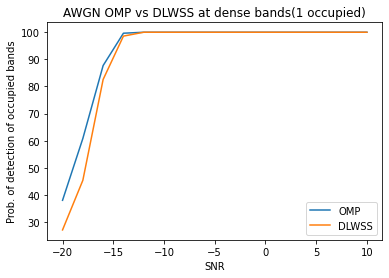

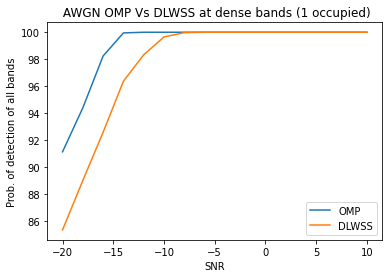

In [121]:
acc_awgn_1_sc=np.array(acc_awgn_1)*100
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_1[1:])
plt.plot(SNR,acc_awgn_1_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(1 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_1[1:])
plt.plot(SNR,acc_awgn_1_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (1 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

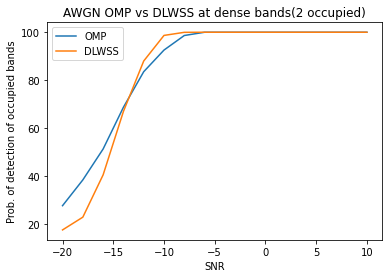

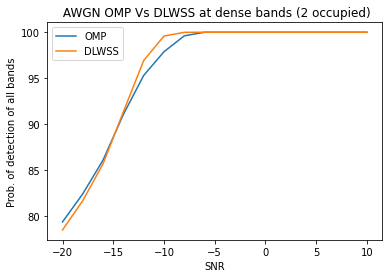

In [113]:
acc_awgn_2_sc=np.array(acc_awgn_2)*100
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_2[1:])
plt.plot(SNR,acc_awgn_2_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(2 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_2[1:])
plt.plot(SNR,acc_awgn_2_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (2 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

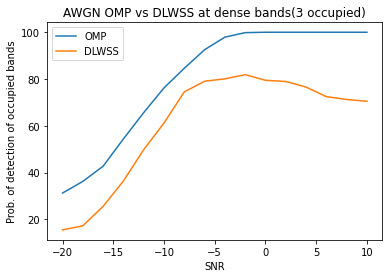

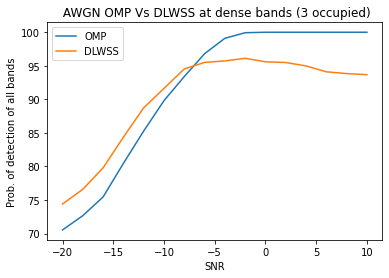

In [115]:
acc_awgn_3_sc=np.array(acc_awgn_3)*100
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_3[1:])
plt.plot(SNR,acc_awgn_3_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(3 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_3[1:])
plt.plot(SNR,acc_awgn_3_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (3 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

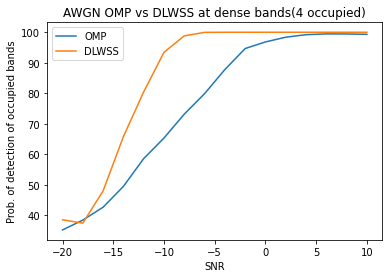

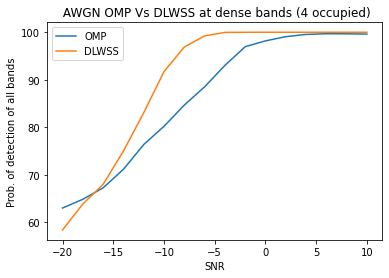

In [93]:
acc_awgn_4_sc=np.array(acc_awgn_4)*100
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_4[1:])
plt.plot(SNR,acc_awgn_4_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(4 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_4[1:])
plt.plot(SNR,acc_awgn_4_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (4 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

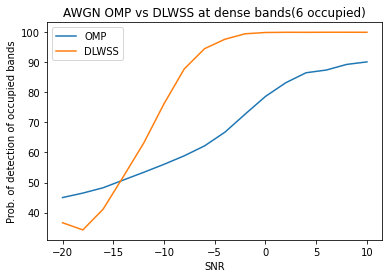

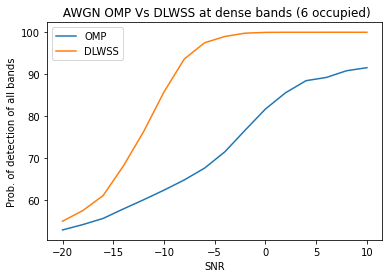

In [82]:
acc_awgn_6_sc=np.array(acc_awgn_6)*100
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_6[1:])
plt.plot(SNR,acc_awgn_6_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(6 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_6[1:])
plt.plot(SNR,acc_awgn_6_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (6 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

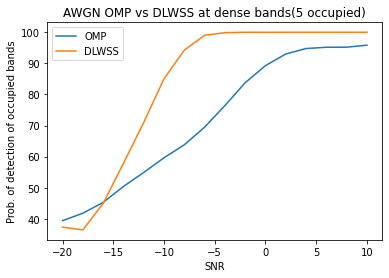

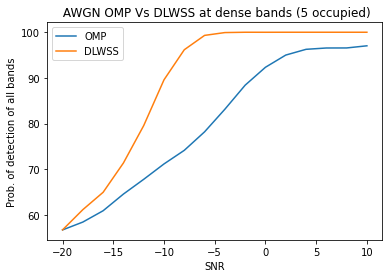

In [76]:
acc_awgn_5_sc=np.array(acc_awgn_5)*100
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_5[1:])
plt.plot(SNR,acc_awgn_5_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(5 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_5[1:])
plt.plot(SNR,acc_awgn_5_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (5 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

In [64]:
acc_awgn_7_sc=np.array(acc_awgn_7)*100

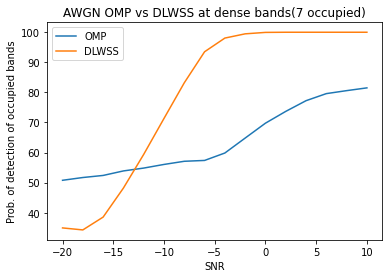

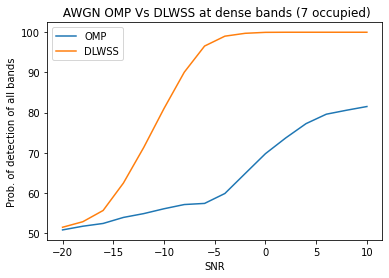

In [65]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_7[1:])
plt.plot(SNR,acc_awgn_7_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(7 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_7[1:])
plt.plot(SNR,acc_awgn_7_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (7 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

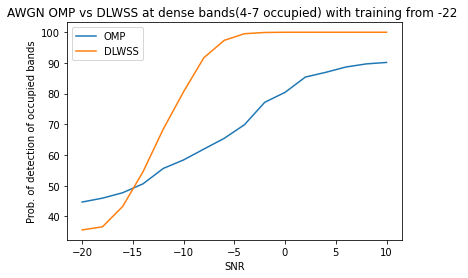

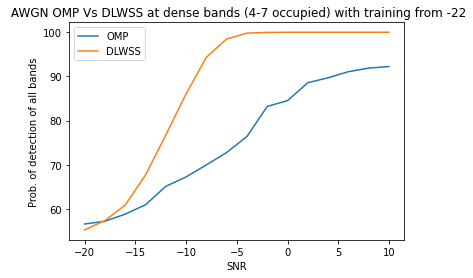

In [34]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_4_7_20_10)
plt.plot(SNR,acc_awgn_4_7_sc[1][1:])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("AWGN OMP vs DLWSS at dense bands(4-7 occupied) with training from -22 ")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_4_7_20_10)
plt.plot(SNR,acc_awgn_4_7_sc[2][1:])
plt.xlabel("SNR")
plt.title(" AWGN OMP Vs DLWSS at dense bands (4-7 occupied) with training from -22")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

In [237]:
acc_4_7_sc=np.array(acc_4_7)*100
acc_1_3_minus20_10_sc=np.array(acc_1_3_minus20_10)*100
accra_1_3_minus20_10_sc=np.array(accra_1_3_minus20_10)*100
accri_1_3_minus20_10_sc=np.array(accri_1_3_minus20_10)*100
accri_4_7_sc=np.array(accri_4_7)*100
accra_4_7_sc=np.array(accra_4_7)*100

In [90]:
accra_sc=np.array(accra)*100
accnew_sc=np.array(accnew)*100
accri_sc=np.array(accri)*100

In [116]:
omp_pd_occupied_bands_awgn_1_3=[82.7586,89.7307,94.583,97.8299,99.1071,99.8221,100,100,100,100,100,100,100,100,100,100]
omp_pd_all_bands_awgn_1_3=[95.1531,97.0816,98.449,99.3673,99.7449,99.949,100,100,100,100,100,100,100,100,100,100]
omp_pd_occupied_bands_awgn_4_7_20_10=np.round(np.array([0.446969,0.459588,0.477299,0.506311,0.556434,
0.584164,0.619496,0.654374,0.698864,0.771914,
0.804253,0.853998,0.869363,0.886763,0.896864,
0.901639])*100,3)
omp_pd_all_bands_awgn_4_7_20_10=np.round(np.array([0.565616,0.571836,0.587947,0.609157,0.650964,0.672275,0.699500,0.727644,
0.763944,0.831964,0.84511,0.885694,0.896910,0.910679,0.918833,0.922300])*100,3)

omp_pd_occupied_bands_awgn_1_3_minus20_10=np.array([0.2998,0.3879,0.5328,0.6669,0.7637,0.8573,0.9189,0.9645,0.9862,0.9989,1.0000,1.0000,1,1,1,1
])*100
omp_pd_all_bands_awgn_1_3_minus20_10=np.array([0.7969,0.8262,0.8676,0.9056,0.9328,0.9594,0.9774,0.9897,0.9961,0.9997,1.0000,1.0000,1,1,1,1       ])*100


omp_pd_occupied_bands_rayleigh_1_3_minus20_10=np.array([
    0.3142,0.3920,0.5314,0.6548,0.7798,0.8449,0.9199,0.9559,0.9906,0.9993,1.0000,1.0000,
    1.0000,1.0000,1.0000,1.0000
    
])*100

omp_pd_all_bands_rayleigh_1_3_minus20_10=np.round(np.array(
    [
        0.8064,0.8223,0.8661,0.9008,0.9379,0.9551,0.9770,0.9872,0.9972,0.9998,1.0000,1.0000,1,1,1,1
    ]

)*100,3)
omp_pd_occupied_bands_rician_1_3_minus20_10=np.array(
[
     0.3047,0.3987,0.5231,0.6649,0.7679,0.8458,0.9175,0.9615,0.9884,1.0000,0.9996,1.000,1.0000,1.0000,1.0000,1.0000

]
)*100

omp_pd_all_bands_rician_1_3_minus20_10=np.array(
[
   0.8034,0.8287,0.8632,0.9050,0.9340,0.9559,0.9763,0.9890,0.9967,1.0000,0.9999,1.0000, 1.0000,1.0000,1.0000,1.0000
]
)*100

omp_pd_occupied_bands_rician_4_7=np.round(np.array([
    0.4458,0.4551,0.4808,0.5099,0.5495,0.5887,0.6153,0.6571,0.7079,0.7579,0.8029,0.8473,
    0.8777,0.8855,0.8922,0.9015
    
])*100,3)
omp_pd_all_bands_rician_4_7=np.round(np.array([
     0.5671,0.5729,0.5897,0.6163,0.6453,0.6780,0.6977,0.7304,0.7721,0.8112,0.8441,0.8794,
     0.9042,0.9100,0.9154,0.9226

])*100,3)

omp_pd_occupied_bands_rayleigh_4_7=np.round(np.array([
     0.4421,0.4530,0.4857,0.5074,0.5450,0.5888,0.6183,0.6534,0.7104,0.7603,0.8238,
    0.8570,0.8748,0.8907,0.8978,0.9071
])*100,3)
omp_pd_all_bands_rayleigh_4_7=np.round(np.array([
    0.5618,0.5713,0.5960,0.6147,0.6431,0.6777,0.7012,0.7246,0.7730,0.8098,0.8617,0.8878,
    0.9016,0.9138,0.9195,0.9275

])*100,3)

omp_pd_occupied_bands_awgn_7=np.round(np.array(
[
    0.5081,0.5077,0.5169,0.5238,0.5388,0.5483,0.5604,0.5709,0.5737,0.5984,0.6481,0.6976,
    0.7368 , 0.7724,0.7959,0.8058,0.8150
]

)*100,3)

omp_pd_all_bands_awgn_7=np.round(np.array(
[
    0.5081,0.5077,0.5169,0.5238,0.5388,0.5483,0.5604,0.5709,0.5737,0.5984,0.6481,0.6976,
    0.7368 , 0.7724,0.7959,0.8058,0.8150
]
)*100,3)
omp_pd_occupied_bands_awgn_6=np.round(np.array(
[
0.4430,0.4500,0.4649,0.4826,0.5085,0.5340,0.5606,0.5890,0.6220,0.6674,
    0.7276,0.7864,0.8320,0.8652,0.8743,0.8929,0.9014
]

)*100,3)

omp_pd_all_bands_awgn_6=np.round(np.array(
[
     0.5226,0.5286,0.5413,0.556,0.5787,0.6006,0.6234,0.6478,0.6760,
    0.7149,0.7665,0.8169,0.8560,0.8845,0.8922,0.9082,0.9155

]
)*100,3)

omp_pd_occupied_bands_awgn_5=np.round(np.array(
[
0.3821,0.3940,0.4180,0.4527,0.5039, 0.5490,0.5963,0.6380,0.6947,0.7640,0.8377,0.8926,
    0.9300,0.9476,0.9517,0.9519,0.9584
]

)*100,3)

omp_pd_all_bands_awgn_5=np.round(np.array(
[
    0.5587,0.5671,0.5843,0.6091,0.6456,0.6779,0.7116,0.7414,0.7819,0.8314,0.8841,0.9233,
    0.9500,0.9626,0.9655,0.9656,0.9703

]
)*100,3)
omp_pd_occupied_bands_awgn_4=np.round(np.array(
[
0.3268,0.3521,0.3843,0.4266,0.4948,0.5859,0.6534,0.7316,0.7987,   
    0.8777,0.9466,0.9682,0.9838,0.9920,0.9946,0.9943,0.9932

]

)*100,3)

omp_pd_all_bands_awgn_4=np.round(np.array(
[
 0.6153,0.6298,0.6482,0.6723,0.7113,0.7634,0.8019,0.8466,
    0.8850,0.9301,0.9695,0.9818, 0.9907,0.9954,0.9969,0.9967,0.9961


]
)*100,3)

omp_pd_occupied_bands_awgn_3=np.round(np.array(
[
0.2814,0.3126,0.3624,0.4274,0.5440,0.6564,0.7621,0.8460,
    0.9252,0.9790,0.9983,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
]

)*100,3)

omp_pd_all_bands_awgn_3=np.round(np.array(
[
 0.692,0.7054,0.7267,0.7546,0.8046,0.8528,0.8981,0.9340,0.9680,0.9910
    ,0.9993,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


]
)*100,3)
omp_pd_occupied_bands_awgn_2=np.round(np.array(
[
0.2261,0.2768,0.3843,0.5132,0.6871,0.8354,0.9257,0.9864,1.0000 ,
    1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
]

)*100,3)

omp_pd_all_bands_awgn_2=np.round(np.array(
[
0.7789,0.7934,0.8241,0.8609,0.9106,0.9530,0.9788,0.9961,1.0000,
    1.0000,1.0000,1.0000, 1.0000,1.0000,1.0000,1.0000,1.0000
]
)*100,3)

omp_pd_occupied_bands_awgn_1=np.round(np.array(
[
0.2421,0.3800,0.6079,0.8771,0.9964,1.0000,1.0000,1.0000,
    1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
]

)*100,3)

omp_pd_all_bands_awgn_1=np.round(np.array(
[
0.8917,0.9114,0.9440,0.9824,0.9995,1.0000,1.0000,1.0000,1.0000,1.0000,
    1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
]
)*100,3)


In [255]:
accra_4_7_sc=np.round(accra_4_7_sc,3)
accri_4_7_sc=np.round(accri_4_7_sc,3)
acc_4_7_sc=np.round(acc_4_7_sc,3)

In [257]:
print(f"SNR |  DLWSS PD all | OMP PD all | DLWSS PD occ | OMP PD occ")
for i in range(16):
    print(f"{-20+i*2}|{acc_4_7_sc[1][i]} |{omp_pd_occupied_bands_awgn_4_7_20_10[i]}|{acc_4_7_sc[2][i]}|{omp_pd_all_bands_awgn_4_7_20_10[i]}")

SNR |  DLWSS PD all | OMP PD all | DLWSS PD occ | OMP PD occ
-20|40.895 |44.697|55.974|56.562
-18|36.11 |45.959|58.408|57.184
-16|41.267 |47.73|62.5|58.795
-14|52.748 |50.631|69.153|60.916
-12|65.842 |55.643|77.459|65.096
-10|79.698 |58.416|87.214|67.227
-8|89.237 |61.95|94.158|69.95
-6|96.694 |65.437|98.265|72.764
-4|99.071 |69.886|99.633|76.394
-2|99.791 |77.191|99.918|83.196
0|99.974 |80.425|99.99|84.511
2|99.974 |85.4|99.99|88.569
4|100.0 |86.936|100.0|89.691
6|100.0 |88.676|100.0|91.068
8|100.0 |89.686|100.0|91.883
10|100.0 |90.164|100.0|92.23


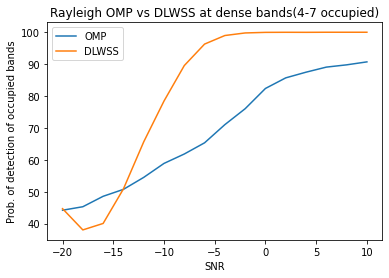

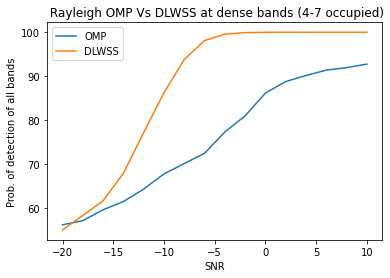

In [240]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_rayleigh_4_7)
plt.plot(SNR,accra_4_7_sc[1])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("Rayleigh OMP vs DLWSS at dense bands(4-7 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_rayleigh_4_7)
plt.plot(SNR,accra_4_7_sc[2])
plt.xlabel("SNR")
plt.title(" Rayleigh OMP Vs DLWSS at dense bands (4-7 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

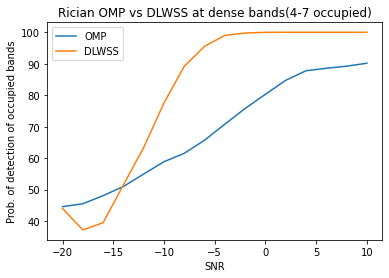

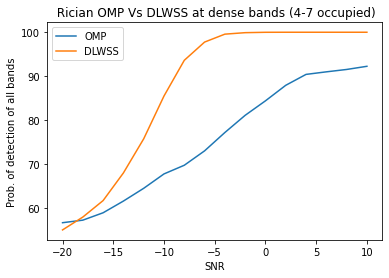

In [227]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_rician_4_7)
plt.plot(SNR,accri_4_7_sc[1])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("Rician OMP vs DLWSS at dense bands(4-7 occupied)")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_rician_4_7)
plt.plot(SNR,accri_4_7_sc[2])
plt.xlabel("SNR")
plt.title(" Rician OMP Vs DLWSS at dense bands (4-7 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

Text(0.5, 1.0, 'Rician OMP vs DLWSS at sparse bands(1-3)')

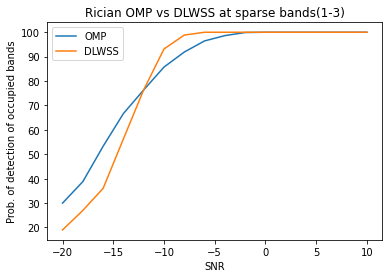

In [198]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_1_3_minus20_10)
plt.plot(SNR,acc_1_3_minus20_10_sc[1])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("Rician OMP vs DLWSS at sparse bands(1-3)")
#plt.figure()
#plt.plot(SNR,omp_pd_all_bands_rician_1_3_minus20_10)
#plt.plot(SNR,accri_1_3_minus20_10_sc[2])
#plt.xlabel("SNR")
#plt.title(" Rician OMP Vs DLWSS at sparse bands (1-3 occupied)")
#plt.ylabel("Prob. of detection of all bands")
#plt.legend(["OMP","DLWSS"])

Text(0.5, 1.0, 'Rayleigh OMP vs dlwss sparse bands (1-3 occupied)')

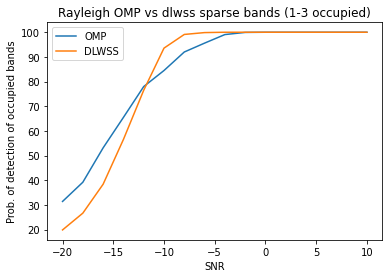

In [183]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_rayleigh_1_3_minus20_10)
plt.plot(SNR,accra_1_3_minus20_10_sc[1])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.title("Rayleigh OMP vs dlwss sparse bands (1-3 occupied)")

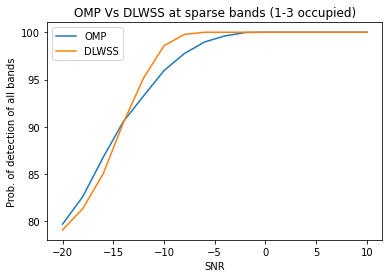

In [158]:
import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
#plt.figure()

#plt.plot(SNR,omp_pd_occupied_bands_awgn_1_3_minus20_10)
#plt.plot(SNR,acc_1_3_minus20_10_sc[1])
#plt.legend(["OMP","DLWSS"])
#plt.xlabel("SNR")
#plt.ylabel("Prob. of detection of occupied bands")
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_1_3_minus20_10)
plt.plot(SNR,acc_1_3_minus20_10_sc[2])
plt.xlabel("SNR")
plt.title("OMP Vs DLWSS at sparse bands (1-3 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

Text(0, 0.5, 'Prob. of detection of occupied bands')

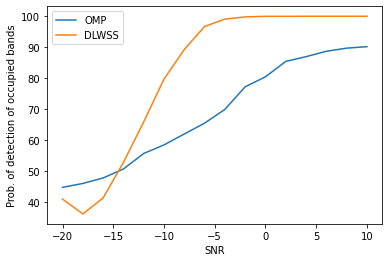

In [139]:

import matplotlib.pyplot as plt
SNR=np.arange(-20,12,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands_awgn_4_7_20_10)
plt.plot(SNR,acc_4_7_sc[1])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.close()
plt.figure()
plt.plot(SNR,omp_pd_all_bands_awgn_4_7_20_10)
plt.plot(SNR,acc_4_7_sc[2])
plt.xlabel("SNR")
plt.title("OMP Vs DLWSS at dense bands (4-7 occupied)")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])


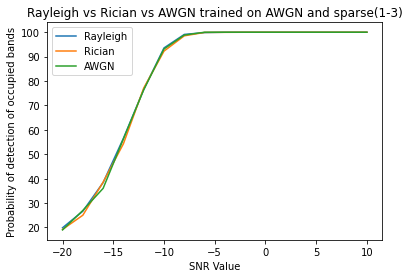

In [200]:
plt.figure()
plt.plot(SNR,accra_1_3_minus20_10_sc[1])
plt.plot(SNR,accri_1_3_minus20_10_sc[1])

plt.plot(SNR,acc_1_3_minus20_10_sc[1])
plt.legend(["Rayleigh","Rician","AWGN"])
plt.title("Rayleigh vs Rician vs AWGN trained on AWGN and sparse(1-3)")
plt.xlabel("SNR Value")
plt.ylabel("Probability of detection of occupied bands")
plt.savefig("Pd_occ_bands_allchannels.png")


#plt.savefig("Pd_all_bands_all_channels.png")
#plt.close()


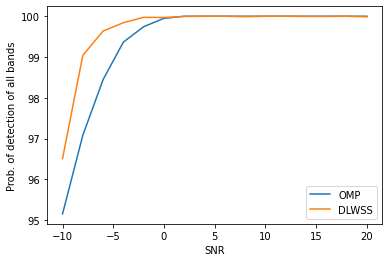

In [53]:
import matplotlib.pyplot as plt
SNR=np.arange(-10,22,2)
plt.figure()

plt.plot(SNR,omp_pd_occupied_bands)
plt.plot(SNR,accnew[1])
plt.legend(["OMP","DLWSS"])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of occupied bands")
plt.close()
plt.figure()
plt.plot(SNR,omp_pd_all_bands)
plt.plot(SNR,accnew[2])
plt.xlabel("SNR")
plt.ylabel("Prob. of detection of all bands")
plt.legend(["OMP","DLWSS"])

In [201]:
accra_1_3_minus20_10[1]

[0.19878223495702005,
 0.26676176890156916,
 0.38403451995685006,
 0.5653748641796451,
 0.7648745519713261,
 0.935647143890094,
 0.991068238656663,
 0.9985865724381625,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [26]:
model.cpu()

DLWSS(
  (conv1): Conv2d(
    2, 256, kernel_size=(1, 150), stride=(1, 1)
    (activation_post_process): HistogramObserver()
  )
  (conv2): Conv2d(
    256, 128, kernel_size=(1, 100), stride=(1, 1)
    (activation_post_process): HistogramObserver()
  )
  (conv3): Conv2d(
    128, 64, kernel_size=(1, 51), stride=(1, 1)
    (activation_post_process): HistogramObserver()
  )
  (fc): Linear(
    in_features=896, out_features=14, bias=True
    (activation_post_process): HistogramObserver()
  )
)

In [27]:
quantization_config = torch.quantization.get_default_qconfig("fbgemm")
quantized_model=DLWSS_quant(fp_model=model)
quantized_model.qconfig = quantization_config
torch.quantization.prepare(quantized_model, inplace=True)

DLWSS_quant(
  (quant): QuantStub(
    (activation_post_process): HistogramObserver()
  )
  (fp_model): DLWSS(
    (conv1): Conv2d(
      2, 256, kernel_size=(1, 150), stride=(1, 1)
      (activation_post_process): HistogramObserver()
    )
    (conv2): Conv2d(
      256, 128, kernel_size=(1, 100), stride=(1, 1)
      (activation_post_process): HistogramObserver()
    )
    (conv3): Conv2d(
      128, 64, kernel_size=(1, 51), stride=(1, 1)
      (activation_post_process): HistogramObserver()
    )
    (fc): Linear(
      in_features=896, out_features=14, bias=True
      (activation_post_process): HistogramObserver()
    )
  )
  (dequant): DeQuantStub()
)

In [28]:
test_all(quantized_model,test_dataloader,"cpu",1)

[-10]
SNR = -10 Acc= 0.6464285714285715


In [29]:
model_int8=torch.quantization.convert(quantized_model)

In [31]:
#start=time.time()
test_all(model_int8,test_dataloader,"cpu")
#end=time.time()
#print(end-start)

[-10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20]
SNR = -10 Acc= 0.6392857142857142
SNR = -8 Acc= 0.8785714285714286
SNR = -6 Acc= 0.9507142857142857
SNR = -4 Acc= 0.9807142857142858
SNR = -2 Acc= 0.9935714285714285
SNR = 0 Acc= 0.9964285714285714
SNR = 2 Acc= 0.9985714285714286
SNR = 4 Acc= 1.0
SNR = 6 Acc= 1.0
SNR = 8 Acc= 1.0
SNR = 10 Acc= 1.0
SNR = 12 Acc= 0.9992857142857143
SNR = 14 Acc= 1.0
SNR = 16 Acc= 1.0
SNR = 18 Acc= 1.0
SNR = 20 Acc= 1.0


In [32]:
model_int8.fp_model.conv1.weight

<bound method Conv2d.weight of QuantizedConv2d(2, 256, kernel_size=(1, 150), stride=(1, 1), scale=0.010934756137430668, zero_point=64)>

In [33]:
torch.save(model_int8.state_dict(),"int8_model.pth")

In [34]:
int8_ld=torch.load("int8_model.pth")

In [41]:
int8_ld.keys()

odict_keys(['quant.scale', 'quant.zero_point', 'fp_model.conv1.weight', 'fp_model.conv1.bias', 'fp_model.conv1.scale', 'fp_model.conv1.zero_point', 'fp_model.conv2.weight', 'fp_model.conv2.bias', 'fp_model.conv2.scale', 'fp_model.conv2.zero_point', 'fp_model.conv3.weight', 'fp_model.conv3.bias', 'fp_model.conv3.scale', 'fp_model.conv3.zero_point', 'fp_model.fc.scale', 'fp_model.fc.zero_point', 'fp_model.fc._packed_params.dtype', 'fp_model.fc._packed_params._packed_params'])

In [44]:
int8_ld["fp_model.conv1.zero_point"]

tensor(64)

In [46]:
int8_ld["fp_model.conv1.bias"]

tensor([ 0.0020,  0.0607,  0.0680,  0.0087, -0.0027, -0.0040, -0.0013,  0.0372,
         0.0706, -0.0337, -0.0015, -0.0051, -0.0169, -0.0083, -0.0034, -0.0077,
        -0.0040,  0.0161, -0.0022, -0.0004,  0.0711,  0.0633, -0.0045,  0.0607,
         0.0010,  0.0470,  0.0539,  0.0258, -0.0115, -0.0025,  0.0062, -0.0107,
         0.0539, -0.0011, -0.0042, -0.0018,  0.0495,  0.0607,  0.0513,  0.0280,
         0.0782, -0.0069,  0.0254, -0.0079, -0.0109, -0.0037, -0.0056, -0.0018,
        -0.0132, -0.0036, -0.0039,  0.0065,  0.0640, -0.0065,  0.0001,  0.0337,
        -0.0079, -0.0046, -0.0026,  0.0665, -0.0016, -0.0072, -0.0079,  0.0033,
        -0.0036, -0.0090,  0.0006,  0.0335,  0.0366, -0.0037, -0.0022,  0.0109,
        -0.0046, -0.0040,  0.0404,  0.0245, -0.0150,  0.0709, -0.0038,  0.0071,
        -0.0058, -0.0031, -0.0089, -0.0094,  0.0041,  0.0520, -0.0055, -0.0045,
         0.0769, -0.0022, -0.0168,  0.0506,  0.0681, -0.0024,  0.0228, -0.0227,
         0.0214,  0.0421, -0.0050,  0.06

In [200]:
class scratch_quant(nn.Module):

    def __init__(self,scaling_factors=None,weights=None):
        super(scratch_quant, self).__init__()
        self.conv1=nn.Conv2d(2,256,(1,150))
        self.conv1.weight=weights[0]
        torch.max(weights[0])
        torch.min(weights[0])
        torch.max(weights[1])
        torch.min(weights[1])
        torch.max(weights[2])
        torch.min(weights[2])
        torch.max(weights[3])
        torch.min(weights[3])
        torch.max(weights[4])
        torch.min(weights[4])
        torch.max(weights[5])
        torch.min(weights[5])
        torch.max(weights[6])
        torch.min(weights[6])
        torch.max(weights[7])
        torch.min(weights[7])
        
        
        self.conv1.bias=weights[1]
        self.conv2=nn.Conv2d(256,128,(1,100))
        self.conv2.weight=weights[2]
        self.conv2.bias=weights[3]
        self.conv3=nn.Conv2d(128,64,(1,51))
        self.conv3.weight=weights[4]
        self.conv3.bias=weights[5]
        self.fc=nn.Linear(14*1*64,14)
        self.fc.weight=weights[6]
        self.fc.bias=weights[7]
        self.max_inter=-1
        self.min_inter=float("inf")
        self.max_conv1=-1
        self.min_conv1=float("inf")
        self.max_conv2=-1
        self.min_conv2=float("inf")
        self.max_conv3=-1
        self.min_conv3=float("inf")
        self.max_fc=-1
        self.min_fc=float("inf")
        #self.scaling_factor=scaling_factors
        #self.QuantWeight()

  

    def QuantWeight(self):
        sc,zp=self.scaling_factor[0]
        convs=[self.conv1,self.conv2,self.conv3,self.fc]
        for conv in convs:
            
            conv_w_flat=torch.flatten(conv.weight)
            conv_b_flat=torch.flatten(conv.bias)
            alpha_w=torch.max(conv_w_flat)-torch.min(conv_w_flat)
            beta_w=torch.min(conv_w_flat)
            alpha_b=torch.max(conv_b_flat)-torch.min(conv_b_flat)
            beta_b=torch.min(conv_b_flat)
            sc_w=(conv_w_flat-beta_w)/alpha_w
            #z_w=-torch.round(beta_w*s)-2**7
            sc_b=(conv_b_flat-beta_b)/alpha_b
            #z_b=-torch.round(beta_b*s)-2**7           
            s=255
            
            e_w=torch.where(s*sc_w - torch.floor(s*sc_w) > 0.5, 1, 0)
            e_b=torch.where(s*sc_b - torch.floor(s*sc_b) > 0.5, 1, 0)
            #flat_w_quant=torch.round(conv_w_flat/sc_w+z_w)
            #flat_b_quant=torch.round(conv_b_flat/sc_b+z_b)
            
            flat_w_quant=alpha_w*(torch.floor(sc_w*s)/s + e_w/s)+ beta_w
            flat_b_quant=alpha_b*(torch.floor(sc_b*s)/s + e_b/s)+beta_b
            
            
            #flat_w_quant=torch.floor(sc_w*s)
            #flat_b_quant=torch.floor(sc_b*s)
            #flat_w_quant=torch.floor(conv_w_flat*s)
            #flat_b_quant=torch.floor(conv_b_flat*s)
            print(flat_b_quant)
            conv.weight=torch.nn.Parameter(flat_w_quant.reshape(conv.weight.shape))
            conv.bias=torch.nn.Parameter(flat_b_quant.reshape(conv.bias.shape))
            
    
    def get_minMax(self):
        print(f"Conv1, Min= {self.min_conv1} , Max= {self.max_conv1} ")
        print(f"Conv2, Min= {self.min_conv2} , Max= {self.max_conv2} ")
        print(f"Conv3, Min= {self.min_conv3} , Max= {self.max_conv3} ")
        print(f"FC, Min= {self.min_fc} , Max= {self.max_fc} ")
        print(f"Combined, Min= {self.min_inter} , Max= {self.max_inter}")
        
    

    def QuantAct(self,act,layer):
        sc,zp=self.scaling_factor[layer]
        flat=torch.flatten(act)
        flat_quant=torch.round(flat/sc+zp)
        return flat_quant.reshape(act.shape)


    def forward(self,x):
        x=self.conv1(x)
        self.max_inter=x.max() if x.max() > self.max_inter else self.max_inter
        self.min_inter=x.min() if x.min() < self.min_inter else self.min_inter
        self.max_conv1=x.max() if x.max() > self.max_conv1 else self.max_conv1
        self.min_conv1=x.min() if x.min() < self.min_conv1 else self.min_conv1        
        x=F.relu(x)
        
        #x=self.QuantAct(x,1)
        #print(x.cpu().detach().numpy().dtype)
        x=self.conv2(x)
        self.max_inter=x.max() if x.max() > self.max_inter else self.max_inter
        self.min_inter=x.min() if x.min() < self.min_inter else self.min_inter
        self.max_conv2=x.max() if x.max() > self.max_conv2 else self.max_conv2
        self.min_conv2=x.min() if x.min() < self.min_conv2 else self.min_conv2 
        x=F.relu(x)
        #x=self.QuantAct(x,2)
        x=self.conv3(x)
        self.max_inter=x.max() if x.max() > self.max_inter else self.max_inter
        self.min_inter=x.min() if x.min() < self.min_inter else self.min_inter
        self.max_conv3=x.max() if x.max() > self.max_conv3 else self.max_conv3
        self.min_conv3=x.min() if x.min() < self.min_conv3 else self.min_conv3 
        x=F.relu(x)
        #x=self.QuantAct(x,3)
        x=torch.flatten(x,1)
        x=self.fc(x)
        self.max_inter=x.max() if x.max() > self.max_inter else self.max_inter
        self.min_inter=x.min() if x.min() < self.min_inter else self.min_inter
        self.max_fc=x.max() if x.max() > self.max_fc else self.max_fc
        self.min_fc=x.min() if x.min() < self.min_fc else self.min_fc         #x=self.QuantAct(x,4)
        return torch.sigmoid(x)
   

   
    

In [201]:
ld_model=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
weights=get_weight_matrix(ld_model)


In [202]:
for i in weights:
    print(i.max(),i.min())
    

tensor(0.4887, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.3977, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.0175, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0846, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.3637, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.4812, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.0656, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0380, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.9561, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.8755, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.1673, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0295, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.4214, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.4294, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.0219, device='cuda:0', grad_fn=<MaxBackward1>) tensor(-0.0661, device='cuda:0', grad_fn=<MinBackward1>)


In [189]:
obs_model=scratch_quant(weights=weights)

In [191]:
ld_model=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
acc_awgn_4_7=test_all(ld_model,device,directory="Paper_Evaluation_Datasets/test_awgn_1_3",n_samples=1400,datafiles=datafiles_long)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.4821617802896503
Band match accuracy SNR= SNR_-20 .Accuracy=0.6033673469387755
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.4813248766737139
Band match accuracy SNR= SNR_-18 .Accuracy=0.668469387755102


KeyboardInterrupt: 

In [190]:
acc_awgn_4_7=test_all(obs_model,device,directory="Paper_Evaluation_Datasets/test_awgn_1_3",n_samples=1400,datafiles=datafiles_long)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.4821617802896503
Band match accuracy SNR= SNR_-20 .Accuracy=0.6033673469387755
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.4813248766737139
Band match accuracy SNR= SNR_-18 .Accuracy=0.668469387755102
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.5261461318051576
Band match accuracy SNR= SNR_-16 .Accuracy=0.7394387755102041
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.6746428571428571
Band match accuracy SNR= SNR_-14 .Accuracy=0.8015816326530613
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.8764409221902018
Band match accuracy SNR= SNR_-12 .Accuracy=0.8720408163265306
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.9784832451499118
Band match accuracy SNR= SNR_-10 .Accuracy=0.9144897959183673
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.999278759466282
Band match acc

AttributeError: 'list' object has no attribute 'max'

In [192]:
obs_model.get_minMax()

Conv1, Min= -1.6447100639343262 , Max= 1.4544757604599 
Conv2, Min= -73.06157684326172 , Max= 9.00783920288086 
Conv3, Min= -55.44580841064453 , Max= 199.30918884277344 
FC, Min= -86.59420013427734 , Max= 158.9755401611328 
Combined, Min= -86.59420013427734 , Max= 199.30918884277344


In [221]:
m2=DLWSS()

In [222]:
model=torch.load("")

DLWSS(
  (conv1): Conv2d(2, 256, kernel_size=(1, 150), stride=(1, 1))
  (conv2): Conv2d(256, 128, kernel_size=(1, 100), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(1, 20), stride=(1, 1))
  (fc): Linear(in_features=896, out_features=14, bias=True)
)

In [123]:
def get_weight_matrix(model_2):
    weights=[
    model_2.conv1.weight,
    model_2.conv1.bias,
    model_2.conv2.weight,
    model_2.conv2.bias,
    model_2.conv3.weight,
    model_2.conv3.bias,
    model_2.fc.weight,
    model_2.fc.bias
    ]
    return weights

In [234]:
int_model=int8_ld
#keys=int_model.keys()
scaling_factors=[
    (int_model["quant.scale"],int_model["quant.zero_point"]),
    (int_model["fp_model.conv1.scale"],int_model["fp_model.conv1.zero_point"]),
    (int_model["fp_model.conv2.scale"],int_model["fp_model.conv2.zero_point"]),
    (int_model["fp_model.conv3.scale"],int_model["fp_model.conv3.zero_point"]),
    (int_model["fp_model.fc.scale"],int_model["fp_model.fc.zero_point"]),
]




In [263]:
weights=get_weight_matrix(model_2)

In [277]:
scratch_post_quant=scratch_quant(scaling_factors,weights)

tensor([ 0.0021,  0.0608,  0.0681,  0.0089, -0.0029, -0.0039, -0.0011,  0.0371,
         0.0708, -0.0339, -0.0016, -0.0052, -0.0171, -0.0084, -0.0034, -0.0075,
        -0.0039,  0.0162, -0.0020, -0.0002,  0.0713,  0.0635, -0.0043,  0.0608,
         0.0012,  0.0471,  0.0540,  0.0257, -0.0116, -0.0025,  0.0062, -0.0107,
         0.0540, -0.0011, -0.0043, -0.0016,  0.0494,  0.0608,  0.0512,  0.0280,
         0.0781, -0.0070,  0.0253, -0.0080, -0.0111, -0.0039, -0.0057, -0.0016,
        -0.0134, -0.0034, -0.0039,  0.0066,  0.0640, -0.0066,  0.0002,  0.0339,
        -0.0080, -0.0048, -0.0025,  0.0663, -0.0016, -0.0070, -0.0080,  0.0034,
        -0.0034, -0.0089,  0.0007,  0.0335,  0.0367, -0.0039, -0.0020,  0.0107,
        -0.0048, -0.0039,  0.0403,  0.0244, -0.0148,  0.0708, -0.0039,  0.0071,
        -0.0057, -0.0029, -0.0089, -0.0093,  0.0039,  0.0521, -0.0057, -0.0043,
         0.0767, -0.0020, -0.0171,  0.0508,  0.0681, -0.0025,  0.0226, -0.0225,
         0.0212,  0.0421, -0.0048,  0.06

In [280]:
test_all(scratch_post_quant,test_dataloader,device,"Pytorch_test_datasets",16)

[-10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20]
Exact Matching Accuracy SNR = -10 Acc= 0.6478571428571429
Only Ones Accuracy SNR = -10 + Accuracy = 0.8681476173414546
Exact Matching Accuracy SNR = -8 Acc= 0.8835714285714286
Only Ones Accuracy SNR = -8 + Accuracy = 0.9671242774566474
Exact Matching Accuracy SNR = -6 Acc= 0.9564285714285714
Only Ones Accuracy SNR = -6 + Accuracy = 0.9841381741275996
Exact Matching Accuracy SNR = -4 Acc= 0.9807142857142858
Only Ones Accuracy SNR = -4 + Accuracy = 0.9922425952045134
Exact Matching Accuracy SNR = -2 Acc= 0.9942857142857143
Only Ones Accuracy SNR = -2 + Accuracy = 0.9978323699421965
Exact Matching Accuracy SNR = 0 Acc= 0.9978571428571429
Only Ones Accuracy SNR = 0 + Accuracy = 0.9989414255469301
Exact Matching Accuracy SNR = 2 Acc= 0.9992857142857143
Only Ones Accuracy SNR = 2 + Accuracy = 0.9996447602131439
Exact Matching Accuracy SNR = 4 Acc= 1.0
Only Ones Accuracy SNR = 4 + Accuracy = 1.0
Exact Matching Accuracy SNR = 6 

In [281]:
scratch_post_quant.get_minMax()
# 10 bit integer, rest fractional

Conv1, Min= 0.0 , Max= 0.8155947923660278 
Conv2, Min= 0.0 , Max= 38.93829345703125 
Conv3, Min= 0.0 , Max= 412.5731506347656 
FC, Min= -48.39225769042969 , Max= 64.89157104492188 
Combined, Min= -48.39225769042969 , Max= 412.5731506347656


In [214]:
torch.save(model.state_dict(),"pytorch_bench.pth")

In [226]:
ld=DLWSS()

ld.load_state_dict(torch.load("pytorch_bench.pth"))

RuntimeError: Error(s) in loading state_dict for DLWSS:
	Unexpected key(s) in state_dict: "conv1.activation_post_process.eps", "conv1.activation_post_process.histogram", "conv1.activation_post_process.min_val", "conv1.activation_post_process.max_val", "conv2.activation_post_process.eps", "conv2.activation_post_process.histogram", "conv2.activation_post_process.min_val", "conv2.activation_post_process.max_val", "conv3.activation_post_process.eps", "conv3.activation_post_process.histogram", "conv3.activation_post_process.min_val", "conv3.activation_post_process.max_val", "fc.activation_post_process.eps", "fc.activation_post_process.histogram", "fc.activation_post_process.min_val", "fc.activation_post_process.max_val". 

In [227]:
ls=DLWSS()

In [220]:
ld_model=torch.load("/home/iiitd/Desktop/rohith/Trained_Models/model_pytorch_4_7_minus20_10_final.pth")

In [221]:
ld_model

DLWSS(
  (conv1): Conv2d(2, 256, kernel_size=(1, 150), stride=(1, 1))
  (conv2): Conv2d(256, 128, kernel_size=(1, 100), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(1, 51), stride=(1, 1))
  (fc): Linear(in_features=896, out_features=14, bias=True)
)

In [222]:
maxi=-float("inf")
mini=float("inf")

for param in ld_model.parameters():
    if maxi<param.cpu().detach().numpy().max():
        maxi=param.cpu().detach().numpy().max()
    if mini>param.cpu().detach().numpy().min():
        mini=param.cpu().detach().numpy().min()

print(mini,maxi)

-0.34596702 0.45985207


In [224]:
min_xq

-32768

In [382]:
def combinedTestArray():
    datas=16
    datafiles=datafiles_long
    test_samples=1400
    directory="pytorch_test_awgn_4"
    all_test=np.zeros((test_samples*datas,2,14,299))
    for i,SNR in enumerate(datafiles):
        load_test=np.loadtxt(directory+"/test_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,2,14,299))
        #load_label=np.loadtxt(directory+"/test_label_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,14))    
        all_test[i*test_samples:(i+1)*test_samples,:,:,:]=load_test

    #print(all_test.shape)
    return all_test

In [383]:
print(quant)

8


In [264]:
def quantizeLayer(layer,bits,method):
    if method=="None":
        return layer
    if method=="simple":
        return torch.round(layer*2**(bits-1))
    beta_q=2**(bits-1)-1
    alpha_q=-2**(bits-1)
    beta=torch.max(layer)
    alpha=torch.min(layer)
    scale=(beta-alpha)/(beta_q-alpha_q)
    offset= beta_q- beta/scale
    offset.round_()
    offset=0
    print(scale,offset)
    q_x=offset+torch.round(layer/scale)
    q_x=torch.clamp(q_x,alpha_q,beta_q)
    if method=="sczp":
        return q_x
    return ((q_x.clamp_(alpha_q,beta_q).round_())-offset)*scale 
    #return q 
def update_minmax(new,old):
    return (min(new[0],old[0]),max(new[1],old[1]))

def calc_sczp(minmax,q):
    alpha=minmax[0]
    beta=minmax[1]
    alpha_q=0
    beta_q=2**(q)-1
    sc=(beta-alpha)/(beta_q-alpha_q)
    zp=torch.round(beta_q- beta/sc)
    return (sc,zp)
def sczp_activations(dataloader,model,fraction=0.1,q=0.1):
    model.to(device)
    minMax=None
    for i,data in enumerate(dataloader):
        if i==int(fraction*len(dataloader)):
            break
        inputs,label=data
        inputs=inputs.to(device)
        out,tminMax=model(inputs)
        if minMax is None:
            minMax=tminMax
        else:
            for i,val in enumerate(tminMax):
                minMax[i]=update_minmax(val,minMax[i])

    sczps=[]        
    for ms in minMax:
        sczps.append(calc_sczp(ms,q))
    return sczps
        
        
        
        
        

In [259]:
class DLWSS_qbit(nn.Module):
    def __init__(self,fpmodel,q,methodw=None,methodb=None,sczps=None,observer_mode=False,quantize_activations=True):
        super(DLWSS_qbit, self).__init__()
        self.conv1=nn.Conv2d(2,256,(1,150))
        self.conv2=nn.Conv2d(256,128,(1,100))
        self.conv3=nn.Conv2d(128,64,(1,51))
        self.fc=nn.Linear(14*1*64,14)
        self.fpmodel=fpmodel
        self.q=q
        self.observer_mode=observer_mode
        self.quantize_activations=False
        self.methodw=methodw
        self.methodb=methodb
        self.sczps=sczps
        self.quantize_weights()
        
    def quantize_weights(self):
        self.conv1.weight.data=quantizeLayer(self.fpmodel.conv1.weight.data,self.q,self.methodw)
        self.conv1.bias.data=quantizeLayer(self.fpmodel.conv1.bias.data,self.q,self.methodb)
        self.conv2.weight.data=quantizeLayer(self.fpmodel.conv2.weight.data,self.q,self.methodw)
        self.conv2.bias.data=quantizeLayer(self.fpmodel.conv2.bias.data,self.q,self.methodb)
        self.conv3.weight.data=quantizeLayer(self.fpmodel.conv3.weight.data,self.q,self.methodw)
        self.conv3.bias.data=quantizeLayer(self.fpmodel.conv3.bias.data,self.q,self.methodb)
        self.fc.weight.data=quantizeLayer(self.fpmodel.fc.weight.data,self.q,self.methodw)
        self.fc.bias.data=quantizeLayer(self.fpmodel.fc.bias.data,self.q,self.methodb)
    def minMaxObserver(self,x):
        return x.min().item(),x.max().item()
    def forward(self,x):
        minMax=[]
        alpha_q=0
        beta_q=2**(self.q)-1
        
        x=F.relu(self.conv1(x))
        if self.observer_mode:
            xmin,xmax=self.minMaxObserver(x)
            minMax.append((xmin,xmax))
        if self.quantize_activations:
            x=torch.clamp(torch.round(x/sczps[0][0])+sczps[0][1],alpha_q,beta_q)
        #print(x.min().item(),x.max().item())
        #x=torch.clamp(x,min=-128,max=127)
        x=F.relu(self.conv2(x))
        if self.observer_mode:
            xmin,xmax=self.minMaxObserver(x)
            minMax.append((xmin,xmax))
        if self.quantize_activations:
            x=torch.clamp(torch.round(x/sczps[1][0])+sczps[1][1],alpha_q,beta_q)
        #print(x.min().item(),x.max().item())
        #x=torch.clamp(x,min=-128,max=127)
        x=F.relu(self.conv3(x))
        if self.observer_mode:
            xmin,xmax=self.minMaxObserver(x)
            minMax.append((xmin,xmax))
        if self.quantize_activations:
            x=torch.clamp(torch.round(x/sczps[2][0])+sczps[2][1],alpha_q,beta_q)
        #print(x.min().item(),x.max().item())
        #x=torch.clamp(x,min=-128,max=127)
        x=torch.flatten(x,1)
        x=self.fc(x)
        if self.observer_mode:
            xmin,xmax=self.minMaxObserver(x)
            minMax.append((xmin,xmax))
        if self.quantize_activations:
            x=torch.clamp(torch.round(x/sczps[3][0])+sczps[3][1],alpha_q,beta_q)
        #print(x.min().item(),x.max().item())
        #x=torch.clamp(x,min=-128,max=127)
        x=torch.sigmoid(x)
        if self.observer_mode:
            return x,minMax
        return x

    

In [555]:
wconv1=np.loadtxt("wconv1.txt").reshape((1, 150, 2, 256)).transpose(3,2,0,1)
bconv1=np.loadtxt("bconv1.txt").reshape((256,))
wconv2=np.loadtxt("wconv2.txt").reshape((1, 100, 256, 128)).transpose(3,2,0,1)
bconv2=np.loadtxt("bconv2.txt").reshape((128,))
wconv3=np.loadtxt("wconv3.txt").reshape((1, 51, 128, 64)).transpose(3,2,0,1)
bconv3=np.loadtxt("bconv3.txt").reshape((64,))
wfc=np.loadtxt("wfc.txt").reshape((896, 14)).transpose(1,0)
bfc=np.loadtxt("bfc.txt").reshape((14,))
ld_model=torch.load("/home/iiitd/Desktop/rohith/Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
ld_model.conv1.weight.data=torch.tensor(wconv1).to(torch.float)
ld_model.conv2.weight.data=torch.tensor(wconv2).to(torch.float)
ld_model.conv3.weight.data=torch.tensor(wconv3).to(torch.float)
ld_model.conv1.bias.data=torch.tensor(bconv1).to(torch.float)
ld_model.conv2.bias.data=torch.tensor(bconv2).to(torch.float)
ld_model.conv3.bias.data=torch.tensor(bconv3).to(torch.float)
ld_model.fc.weight.data=torch.tensor(wfc).to(torch.float)
ld_model.fc.bias.data=torch.tensor(bfc).to(torch.float)

In [631]:
quant=4
ld_model=torch.load("/home/iiitd/Desktop/rohith/Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
qbit_model=DLWSS_qbit(ld_model,quant,"sczp",observer_mode=True,quantize_activations=False)
SNR="SNR_10"
load_test=np.loadtxt(directory+"test_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,2,14,299))
load_label=np.loadtxt(directory+"test_label_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,14))
test_dataloader=DataLoader(snr_test_dataset(load_test,load_label))
sczps=sczp_activations(test_dataloader,qbit_model,fraction=1,q=quant)



0.0 58.8238639831543
0.0 353938.34375
0.0 304951328.0
-61504868352.0 27772694528.0
0.0 57.38287353515625
0.0 308175.25
0.0 222281920.0
-33516750848.0 23795179520.0
0.0 53.5915641784668
0.0 293877.21875
0.0 242440016.0
-38106542080.0 28781670400.0
0.0 50.54579544067383
0.0 297996.21875
0.0 263634640.0
-45763141632.0 25651908608.0
0.0 52.21537780761719
0.0 299424.21875
0.0 246428192.0
-60200841216.0 38498516992.0
0.0 53.594112396240234
0.0 274581.5625
0.0 269567872.0
-33564616704.0 39013675008.0
0.0 53.26484298706055
0.0 299909.4375
0.0 443565088.0
-161665482752.0 64732372992.0
0.0 71.55848693847656
0.0 476369.34375
0.0 254268768.0
-19916171264.0 36559974400.0
0.0 52.29879379272461
0.0 307729.5625
0.0 464120960.0
-157580689408.0 79118606336.0
0.0 46.89116668701172
0.0 259587.0
0.0 378964288.0
-149274083328.0 69823594496.0
0.0 63.1768913269043
0.0 325531.03125
0.0 466655136.0
-159998099456.0 64157245440.0
0.0 55.61920928955078
0.0 301114.71875
0.0 195597120.0
-31912359936.0 28533671936.0


0.0 502300.0
0.0 260724384.0
-19330174976.0 34941726720.0
0.0 58.8880500793457
0.0 318384.78125
0.0 231808000.0
-29384992768.0 18401726464.0
0.0 55.673763275146484
0.0 289029.78125
0.0 466274880.0
-168166031360.0 67548712960.0
0.0 56.57634735107422
0.0 272121.125
0.0 342105664.0
-136756674560.0 71252172800.0
0.0 57.80893325805664
0.0 348776.28125
0.0 190190992.0
-26218119168.0 10793543680.0
0.0 60.411865234375
0.0 281142.65625
0.0 393269440.0
-126121566208.0 66283216896.0
0.0 60.62149429321289
0.0 311456.65625
0.0 239148496.0
-52797939712.0 22010597376.0
0.0 49.43278884887695
0.0 288035.15625
0.0 397614208.0
-126147387392.0 67054792704.0
0.0 53.196983337402344
0.0 275752.28125
0.0 389551168.0
-137491890176.0 67841732608.0
0.0 93.71971130371094
0.0 449446.34375
0.0 296118080.0
-25605562368.0 40506814464.0
0.0 52.618099212646484
0.0 279484.28125
0.0 271565696.0
-50642718720.0 30490023936.0
0.0 56.43210220336914
0.0 270239.9375
0.0 262136160.0
-46388379648.0 39344017408.0
0.0 58.357597351

0.0 229990.421875
0.0 222470608.0
-33881913344.0 24428875776.0
0.0 47.37677764892578
0.0 247451.90625
0.0 226553552.0
-43739111424.0 22821505024.0
0.0 47.87767028808594
0.0 293133.0
0.0 389410208.0
-143405498368.0 46779748352.0
0.0 58.65705871582031
0.0 281423.5625
0.0 290046176.0
-62807941120.0 34055299072.0
0.0 59.038063049316406
0.0 323896.59375
0.0 381190272.0
-137962291200.0 70792134656.0
0.0 49.39122009277344
0.0 286159.96875
0.0 319797536.0
-91677540352.0 51017216000.0
0.0 52.76692581176758
0.0 273328.5625
0.0 259628656.0
-48977129472.0 35700097024.0
0.0 59.09294891357422
0.0 279220.625
0.0 457896672.0
-137681289216.0 68014768128.0
0.0 69.57475280761719
0.0 296231.09375
0.0 291442816.0
-68320870400.0 49723768832.0
0.0 53.61689758300781
0.0 239543.59375
0.0 220406976.0
-46409101312.0 28550031360.0
0.0 49.95805740356445
0.0 266924.59375
0.0 286897472.0
-69862645760.0 35508072448.0
0.0 54.33216094970703
0.0 316816.09375
0.0 239570272.0
-29176610816.0 16083052544.0
0.0 48.9598884582

0.0 49.99069595336914
0.0 287901.3125
0.0 270596640.0
-63376384000.0 39776280576.0
0.0 53.68125915527344
0.0 290798.90625
0.0 197888288.0
-31042553856.0 22196359168.0
0.0 58.1505241394043
0.0 275016.125
0.0 249983216.0
-47205097472.0 23422545920.0
0.0 56.04622268676758
0.0 302821.6875
0.0 369962976.0
-122152681472.0 60641034240.0
0.0 68.47947692871094
0.0 272850.4375
0.0 386362816.0
-157034315776.0 45057544192.0
0.0 85.6301498413086
0.0 462768.09375
0.0 252195056.0
-23376476160.0 23226585088.0
0.0 48.41151428222656
0.0 281473.65625
0.0 223319648.0
-33888299008.0 28395845632.0
0.0 56.68273162841797
0.0 291550.6875
0.0 220525120.0
-26344226816.0 15978508288.0
0.0 57.71472930908203
0.0 313763.40625
0.0 232630992.0
-31647713280.0 17312667648.0
0.0 60.92665481567383
0.0 272305.0625
0.0 290996544.0
-51056902144.0 21569433600.0
0.0 48.51261520385742
0.0 271734.1875
0.0 397891168.0
-154544701440.0 80279633920.0
0.0 48.027870178222656
0.0 318411.84375
0.0 203709376.0
-27621629952.0 17633558528.

0.0 403702592.0
-132104388608.0 70099943424.0
0.0 58.757713317871094
0.0 299270.78125
0.0 439497184.0
-180252475392.0 84919205888.0
0.0 64.43984985351562
0.0 322170.0625
0.0 438159968.0
-141840596992.0 61712523264.0
0.0 51.36663055419922
0.0 282762.21875
0.0 353531008.0
-106236592128.0 65595604992.0
0.0 72.29401397705078
0.0 445710.4375
0.0 288688416.0
-24964712448.0 31066843136.0
0.0 50.07304000854492
0.0 288190.125
0.0 510295072.0
-175907536896.0 60999933952.0
0.0 80.83477020263672
0.0 484730.75
0.0 280008288.0
-30218555392.0 29138726912.0
0.0 61.799312591552734
0.0 310604.25
0.0 209013280.0
-35313860608.0 23094030336.0
0.0 52.83481979370117
0.0 281595.625
0.0 372529248.0
-140235030528.0 63796551680.0
0.0 61.778133392333984
0.0 341803.8125
0.0 523826784.0
-170271653888.0 70961659904.0
0.0 58.51449966430664
0.0 258423.375
0.0 246869616.0
-52172935168.0 30540804096.0
0.0 55.869319915771484
0.0 285299.96875
0.0 523198304.0
-153495568384.0 72162721792.0
0.0 52.21341323852539
0.0 297617.2

0.0 232086752.0
-64747180032.0 15694700544.0
0.0 52.4162712097168
0.0 277307.28125
0.0 467009248.0
-138413817856.0 81564958720.0
0.0 58.43144989013672
0.0 281147.5625
0.0 488896928.0
-141195100160.0 69609299968.0
0.0 51.001914978027344
0.0 304052.15625
0.0 250908336.0
-33733773312.0 19483817984.0
0.0 47.80689239501953
0.0 260294.828125
0.0 268173424.0
-55818199040.0 25979512832.0
0.0 55.42971420288086
0.0 282906.84375
0.0 283559200.0
-85106753536.0 52227244032.0
0.0 81.29124450683594
0.0 487639.53125
0.0 265902160.0
-30074820608.0 34313549824.0
0.0 54.445125579833984
0.0 283824.125
0.0 204405952.0
-41559654400.0 16549141504.0
0.0 85.44845581054688
0.0 445076.71875
0.0 290394592.0
-24587962368.0 31595476992.0
0.0 59.02156448364258
0.0 347655.65625
0.0 211055520.0
-13394211840.0 21131390976.0
0.0 48.7579460144043
0.0 284690.0625
0.0 228282880.0
-34287087616.0 25798432768.0
0.0 53.911128997802734
0.0 291227.875
0.0 471544640.0
-184677040128.0 86589825024.0
0.0 52.804908752441406
0.0 28068

0.0 295550.03125
0.0 219037616.0
-33402748928.0 16600952832.0
0.0 54.632511138916016
0.0 284118.4375
0.0 250079968.0
-40097538048.0 26102198272.0
0.0 60.355873107910156
0.0 353562.53125
0.0 285503712.0
-52609908736.0 39242317824.0
0.0 55.06100845336914
0.0 325414.59375
0.0 200778848.0
-22250782720.0 17755265024.0
0.0 57.11351013183594
0.0 343646.46875
0.0 464572864.0
-162879864832.0 71661469696.0
0.0 81.11894226074219
0.0 454202.5
0.0 263124608.0
-22551044096.0 40450617344.0
0.0 53.63904571533203
0.0 330511.84375
0.0 339710880.0
-114473721856.0 61281177600.0
0.0 47.334346771240234
0.0 268166.0
0.0 358961760.0
-137982722048.0 60364713984.0
0.0 46.58255386352539
0.0 316221.03125
0.0 249139872.0
-51690381312.0 28405217280.0
0.0 79.11908721923828
0.0 494365.59375
0.0 285004384.0
-24292757504.0 25232263168.0
0.0 48.026947021484375
0.0 304752.875
0.0 224246160.0
-46567223296.0 26694760448.0
0.0 57.898590087890625
0.0 277703.3125
0.0 200520032.0
-35366141952.0 20082819072.0
0.0 56.95202255249

0.0 293028.15625
0.0 286104096.0
-68387446784.0 16600145920.0
0.0 56.03440856933594
0.0 298012.34375
0.0 382884512.0
-140174213120.0 66954035200.0
0.0 53.74164962768555
0.0 314813.875
0.0 209463360.0
-45112832000.0 21653757952.0
0.0 52.04914474487305
0.0 284191.375
0.0 414923264.0
-167583514624.0 67033358336.0
0.0 64.84318542480469
0.0 350183.9375
0.0 517455808.0
-183248273408.0 75762155520.0
0.0 56.435550689697266
0.0 323409.6875
0.0 494908896.0
-142327414784.0 81713635328.0
0.0 54.50971603393555
0.0 282229.875
0.0 514216160.0
-174258782208.0 83591192576.0
0.0 49.251285552978516
0.0 320212.59375
0.0 446054560.0
-164818599936.0 44677300224.0
0.0 57.77735137939453
0.0 299740.9375
0.0 448126592.0
-168260763648.0 73813311488.0
0.0 55.08732986450195
0.0 265781.84375
0.0 263689856.0
-53530214400.0 29878747136.0
0.0 72.63713836669922
0.0 453670.15625
0.0 229753968.0
-21231136768.0 20515796992.0
0.0 49.07769775390625
0.0 235794.453125
0.0 248690752.0
-62423867392.0 21832171520.0
0.0 51.594566

0.0 306998.0
0.0 234719408.0
-32806068224.0 32163121152.0
0.0 51.354644775390625
0.0 267469.25
0.0 228425904.0
-54219407360.0 20502095872.0
0.0 56.309261322021484
0.0 334341.625
0.0 309050752.0
-39135870976.0 24485234688.0
0.0 56.51620101928711
0.0 278677.0
0.0 369081888.0
-124724379648.0 47672967168.0
0.0 49.860862731933594
0.0 267876.0625
0.0 235939552.0
-35262525440.0 26779504640.0
0.0 58.76742172241211
0.0 304671.46875
0.0 379390400.0
-141362118656.0 68149702656.0
0.0 56.392364501953125
0.0 272885.28125
0.0 245289584.0
-34049224704.0 15694272512.0
0.0 57.48600387573242
0.0 287352.90625
0.0 271033568.0
-58363396096.0 43670249472.0
0.0 54.546810150146484
0.0 297184.21875
0.0 465166720.0
-169178529792.0 64384577536.0
0.0 50.17024230957031
0.0 310235.625
0.0 279736992.0
-63666159616.0 37760741376.0
0.0 55.18973922729492
0.0 264844.40625
0.0 394466592.0
-138891165696.0 64400252928.0
0.0 54.79618835449219
0.0 289550.9375
0.0 461539968.0
-188067364864.0 84209975296.0
0.0 74.91930389404297

0.0 268647136.0
-25619965952.0 27519727616.0
0.0 58.4171142578125
0.0 335393.375
0.0 447745248.0
-152220991488.0 61613342720.0
0.0 93.93165588378906
0.0 471233.71875
0.0 252766352.0
-25576118272.0 25304164352.0
0.0 74.05497741699219
0.0 463947.84375
0.0 262385888.0
-18122467328.0 26587791360.0
0.0 58.716064453125
0.0 292278.65625
0.0 220501808.0
-34232117248.0 12852106240.0
0.0 58.030757904052734
0.0 312996.03125
0.0 194791904.0
-27059828736.0 16797603840.0
0.0 53.97562789916992
0.0 285350.34375
0.0 366619776.0
-130247172096.0 51376689152.0
0.0 79.13201141357422
0.0 496299.15625
0.0 261882944.0
-23431462912.0 25592332288.0
0.0 55.54154968261719
0.0 321136.8125
0.0 398772480.0
-142506426368.0 80874184704.0
0.0 48.868797302246094
0.0 268021.71875
0.0 230281104.0
-52884762624.0 25014837248.0
0.0 56.00196075439453
0.0 320326.4375
0.0 506284192.0
-180345733120.0 54667059200.0
0.0 56.30137634277344
0.0 281906.78125
0.0 315533280.0
-86092111872.0 52029104128.0
0.0 58.35870361328125
0.0 267502

0.0 54.6676025390625
0.0 292442.03125
0.0 259147136.0
-43907338240.0 17479983104.0
0.0 53.70752716064453
0.0 297513.625
0.0 438955680.0
-147191742464.0 63556825088.0
0.0 64.2707748413086
0.0 296732.5625
0.0 416956896.0
-128449167360.0 77495255040.0
0.0 57.360374450683594
0.0 271789.9375
0.0 236809824.0
-54869499904.0 25074495488.0
0.0 77.10163116455078
0.0 315700.65625
0.0 312234496.0
-56692588544.0 34041769984.0
0.0 60.293006896972656
0.0 299409.25
0.0 488246048.0
-196747984896.0 53023391744.0
0.0 50.40830612182617
0.0 280742.65625
0.0 450343488.0
-167836844032.0 53015289856.0
0.0 53.17269515991211
0.0 303676.28125
0.0 439259360.0
-140387762176.0 68625379328.0
0.0 47.650630950927734
0.0 296023.21875
0.0 396026688.0
-158076633088.0 70960914432.0
0.0 55.52853775024414
0.0 312561.75
0.0 255561264.0
-74147037184.0 31202422784.0
0.0 57.924293518066406
0.0 288349.6875
0.0 247495168.0
-32376049664.0 20511303680.0
0.0 53.428260803222656
0.0 297283.71875
0.0 296908576.0
-66023342080.0 34757279

0.0 349380.9375
0.0 179078416.0
-15584181248.0 8009670144.0
0.0 56.62993240356445
0.0 255344.296875
0.0 253045504.0
-42193625088.0 31745261568.0
0.0 56.97534942626953
0.0 283187.9375
0.0 373965216.0
-133383184384.0 70655942656.0
0.0 52.08085632324219
0.0 264790.78125
0.0 247991984.0
-63922552832.0 44989493248.0
0.0 53.10398864746094
0.0 300772.9375
0.0 261225648.0
-48344719360.0 41687195648.0
0.0 45.980979919433594
0.0 285563.25
0.0 416423872.0
-143521611776.0 56920432640.0
0.0 51.53496551513672
0.0 260576.28125
0.0 207107440.0
-27111610368.0 13769660416.0
0.0 79.51555633544922
0.0 515423.09375
0.0 236013136.0
-22144577536.0 24126158848.0
0.0 52.27316665649414
0.0 270040.4375
0.0 212703488.0
-50326151168.0 23938062336.0
0.0 51.35234832763672
0.0 265650.9375
0.0 494856800.0
-154786824192.0 92525780992.0
0.0 61.95038604736328
0.0 261749.4375
0.0 240295024.0
-66995744768.0 30008543232.0
0.0 62.55316162109375
0.0 322846.9375
0.0 303687232.0
-63895547904.0 28267397120.0
0.0 55.8411216735839

TypeError: round(): argument 'input' (position 1) must be Tensor, not float

In [632]:

ld_model=torch.load("/home/iiitd/Desktop/rohith/Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
qbit_model=DLWSS_qbit(ld_model,quant,"sczp",sczps=sczps)
directory="/home/iiitd/Desktop/rohith/pytorch_test_awgn_2/"
test_samples=1400
datafiles=datafiles_long
SNR="SNR_10"
load_test=np.loadtxt(directory+"test_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,2,14,299))
load_label=np.loadtxt(directory+"test_label_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,14))

test_dataloader=DataLoader(snr_test_dataset(load_test,load_label))
qbit_model.to(device)
ld_model.to(device)
for i,data in enumerate(test_dataloader):
    print(f"i={i}")
    if i==5:
        break
    inputs,label=data
    #inputs=torch.round(inputs*(2**(quant-1))
    inputs=inputs.to(device)
    label=label.to(device)[0]

    ypred=qbit_model(inputs)
    ypred_float=torch.where(ld_model(inputs)>0.5,1,0)
    pred=torch.where(ypred>0.5,1,0)[0]
    pred=pred.cpu().numpy()
    print(f"Floating model= {ypred_float}")
    print(f"Quant model {ypred}")
    print(pred)
    print((load_label[i]).astype(np.int16))
   








i=0
0.0 146.0
0.0 255.0
0.0 0.0
0.0 0.0
Floating model= tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')
Quant model tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.5000, 0.5000, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0]
i=1
0.0 142.0
0.0 255.0
0.0 0.0
0.0 0.0
Floating model= tensor([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')
Quant model tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.5000, 0.5000, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward>)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 1 0 0 0 0 0 0 0]
i=2
0.0 133.0
0.0 255.0
0.0 0.0
0.0 0.0
Floating model= tensor([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')
Quant model tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.

In [84]:

del PhiComb,YComb,labelcomb

NameError: name 'YComb' is not defined

In [269]:
q=6
ld_model=torch.load("/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/Trained_Models/trained_dlwss_allsparsity.pth")
#qbit_sczp_16=DLWSS_qbit(ld_model,16,methodw="sczp",methodb="None")
qbit_sczp_model=DLWSS_qbit(ld_model,q,methodw="sczpde",methodb="None")
acc_awgn_4_sczp=test_all(qbit_sczp_model,directory="/home/iiitd/Desktop/rohith/Paper_Evaluation_Datasets/test_awgn_4_7",n_samples=2000,datafiles=datafiles_long,device=device)
#acc_awgn_4_sczp_16=test_all(qbit_sczp_16,directory="pytorch_test_awgn_2",n_samples=1400,datafiles=datafiles_long,device=device)



tensor(0.0141, device='cuda:0') 0
tensor(0.0134, device='cuda:0') 0
tensor(0.0291, device='cuda:0') 0
tensor(0.0135, device='cuda:0') 0
['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.3636246122026887
Band match accuracy SNR= SNR_-20 .Accuracy=0.5533673469387755
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.32170949134766647
Band match accuracy SNR= SNR_-18 .Accuracy=0.5816326530612245
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.3534669901672839
Band match accuracy SNR= SNR_-16 .Accuracy=0.6183673469387755
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.4316077715477898
Band match accuracy SNR= SNR_-14 .Accuracy=0.6793877551020409
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.536046511627907
Band match accuracy SNR= SNR_-12 .Accuracy=0.7512244897959184
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.68394867766431
Band

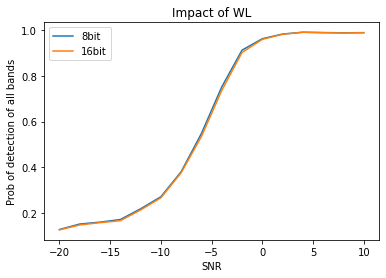

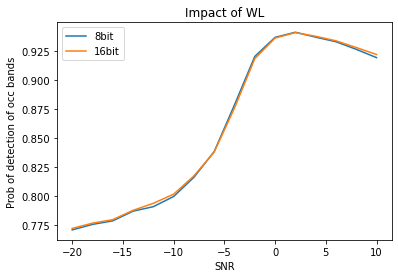

In [576]:
SNR_long=np.arange(-20,12,2)
plt.figure()
plt.plot(SNR_long,acc_awgn_4_sczp[1])
plt.plot(SNR_long,acc_awgn_4_sczp_16[1])
plt.xlabel("SNR")
plt.ylabel("Prob of detection of all bands")
plt.title("Impact of WL")
plt.legend(["8bit","16bit"],loc="best")

plt.figure()
plt.plot(SNR_long,acc_awgn_4_sczp[2])
plt.plot(SNR_long,acc_awgn_4_sczp_16[2])
plt.xlabel("SNR")
plt.ylabel("Prob of detection of occ bands")
plt.title("Impact of WL")
plt.legend(["8bit","16bit"],loc="best")

In [573]:
q=8
ld_model=torch.load("/home/iiitd/Desktop/rohith/Trained_Models/model_pytorch_1_3_minus20_10_final.pth")
qbit_model=DLWSS_qbit(ld_model,q,methodw="simple",methodb="simple")
qbit_sczp_model=DLWSS_qbit(ld_model,q,methodw="sczp",methodb="None")
qbit_sczpde_model=DLWSS_qbit(ld_model,q,methodw="sczpde",methodb="sczpde")

#datafiles=np.arange(-10,22,2)
acc_awgn_4_simple=test_all(qbit_model,directory="pytorch_test_awgn_2",n_samples=1400,datafiles=datafiles_long,device=device)
acc_awgn_4_sczp=test_all(qbit_sczp_model,directory="pytorch_test_awgn_2",n_samples=1400,datafiles=datafiles_long,device=device)
acc_awgn_4_fp=test_all(ld_model,directory="pytorch_test_awgn_2",n_samples=1400,datafiles=datafiles_long,device=device)
acc_awgn_4_sczpde=test_all(qbit_sczpde_model,directory="pytorch_test_awgn_2",n_samples=1400,datafiles=datafiles_long,device=device)
#acc_awgn_4=test_all_quant(qbit_model,device,in_scale,in_offset,directory="pytorch_test_awgn_4",n_samples=1400,datafiles=datafiles_longer)

['SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.18464285714285714
Band match accuracy SNR= SNR_-20 .Accuracy=0.7796938775510204
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.24928571428571428
Band match accuracy SNR= SNR_-18 .Accuracy=0.8137755102040817
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.4085714285714286
Band match accuracy SNR= SNR_-16 .Accuracy=0.851938775510204
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.6492857142857142
Band match accuracy SNR= SNR_-14 .Accuracy=0.9088265306122449
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.8585714285714285
Band match accuracy SNR= SNR_-12 .Accuracy=0.9631632653061224
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.9757142857142858
Band match accuracy SNR= SNR_-10 .Accuracy=0.9933673469387755
Only Ones Accuracy SNR = SNR_-8 . Accuracy = 0.9985714285714286
Band match 

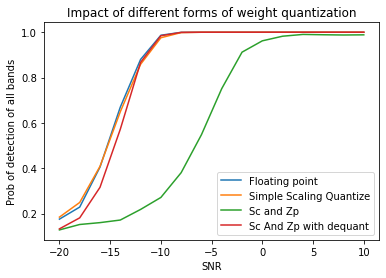

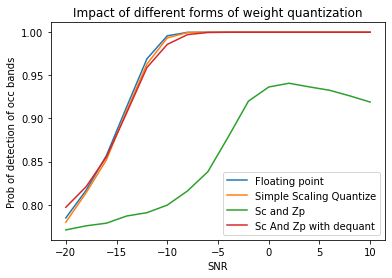

In [574]:
SNR_long=np.arange(-20,12,2)
plt.figure()
plt.plot(SNR_long,acc_awgn_4_fp[1])
plt.plot(SNR_long,acc_awgn_4_simple[1])
plt.plot(SNR_long,acc_awgn_4_sczp[1])
plt.plot(SNR_long,acc_awgn_4_sczpde[1])
plt.xlabel("SNR")
plt.ylabel("Prob of detection of all bands")
plt.title("Impact of different forms of weight quantization")
plt.legend(["Floating point","Simple Scaling Quantize","Sc and Zp","Sc And Zp with dequant"],loc="best")

plt.figure()
plt.plot(SNR_long,acc_awgn_4_fp[2])
plt.plot(SNR_long,acc_awgn_4_simple[2])
plt.plot(SNR_long,acc_awgn_4_sczp[2])
plt.plot(SNR_long,acc_awgn_4_sczpde[2])
plt.xlabel("SNR")
plt.ylabel("Prob of detection of occ bands")
plt.title("Impact of different forms of weight quantization")
plt.legend(["Floating point","Simple Scaling Quantize","Sc and Zp","Sc And Zp with dequant"],loc="best")

In [231]:
def test_all_quant(model,device,scale,offset,directory="Pytorch_test_datasets",n_samples=7000,datafiles=datafiles_long,datas=16,half=False):
    

    
    exact_pred_list=[]
    p_of_det=[]
    band_match_acc=[]
    print(datafiles)
    model.to(device)
    test_samples=n_samples
    

    for SNR in datafiles:
        load_test=np.loadtxt(directory+"/test_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,2,14,299))
        load_label=np.loadtxt(directory+"/test_label_"+str(SNR)+".dat",delimiter=",").reshape((test_samples,14))
        load_test=np.round(load_test/scale+offset)
        #print(load_test.max())
        test_dataloader=DataLoader(snr_test_dataset(load_test,load_label))
        true_1=0
        pred_1=0
        true_1_only1=0
        pred_1_only1=0
        pred_1_bands=0
        true_1_bands=0
        
        for i,data in enumerate(test_dataloader):            
            inputs,label=data
            inputs=inputs.to(device)
            label=label.to(device)[0]
            if(half):
                inputs=inputs.half()
            ypred=model(inputs)
            pred=torch.where(ypred>0.5,1,0)[0]
            pred=pred.cpu().numpy()
            if(np.sum(np.abs(pred-load_label[i]))==0):
                pred_1+=1
                true_1+=1
            else:
                true_1+=1
            for j in range(14):
                if(pred[j]==1 and load_label[i][j]==1):
                    pred_1_only1+=1
                    true_1_only1+=1
                if(pred[j]==0 and load_label[i][j]==1):
                    true_1_only1+=1
                if(pred[j]==load_label[i][j]):
                    pred_1_bands+=1
                true_1_bands+=1


        exact_acc=pred_1/true_1
        exact_pred_list.append(exact_acc)
        p_of_det.append(pred_1_only1/true_1_only1)
        band_match_acc.append(pred_1_bands/true_1_bands)
        
        #print("Exact Matching Accuracy SNR = "+str(SNR)+" Acc= "+str(pred_1/true_1))
        print(f"Only Ones Accuracy SNR = {str(SNR)} . Accuracy = {str(pred_1_only1/true_1_only1)}")
        print(f"Band match accuracy SNR= {str(SNR)} .Accuracy={str(pred_1_bands/true_1_bands)}")
    return [exact_pred_list,p_of_det,band_match_acc]

In [232]:
#ld_model=torch.load("/home/iiitd/Desktop/rohith/Trained_Models/model_pytorch_4_7_minus20_10_final.pth")
acc_awgn_4=test_all_quant(ld_model,device,in_scale,in_offset,directory="pytorch_test_awgn_4",n_samples=1400,datafiles=datafiles_longer)

['SNR_-22', 'SNR_-20', 'SNR_-18', 'SNR_-16', 'SNR_-14', 'SNR_-12', 'SNR_-10', 'SNR_-8', 'SNR_-6', 'SNR_-4', 'SNR_-2', 'SNR_0', 'SNR_2', 'SNR_4', 'SNR_6', 'SNR_8', 'SNR_10']
Only Ones Accuracy SNR = SNR_-22 . Accuracy = 0.0007142857142857143
Band match accuracy SNR= SNR_-22 .Accuracy=0.713265306122449
Only Ones Accuracy SNR = SNR_-20 . Accuracy = 0.0026785714285714286
Band match accuracy SNR= SNR_-20 .Accuracy=0.7123469387755103
Only Ones Accuracy SNR = SNR_-18 . Accuracy = 0.007857142857142858
Band match accuracy SNR= SNR_-18 .Accuracy=0.7107142857142857
Only Ones Accuracy SNR = SNR_-16 . Accuracy = 0.012857142857142857
Band match accuracy SNR= SNR_-16 .Accuracy=0.7081122448979592
Only Ones Accuracy SNR = SNR_-14 . Accuracy = 0.0175
Band match accuracy SNR= SNR_-14 .Accuracy=0.7085204081632653
Only Ones Accuracy SNR = SNR_-12 . Accuracy = 0.011964285714285714
Band match accuracy SNR= SNR_-12 .Accuracy=0.7115816326530612
Only Ones Accuracy SNR = SNR_-10 . Accuracy = 0.01660714285714286


In [220]:
class DLWSS(nn.Module):
  def __init__(self):
    super(DLWSS, self).__init__()
    self.conv1=nn.Conv2d(2,256,(1,150))
    self.conv2=nn.Conv2d(256,128,(1,100))
    self.conv3=nn.Conv2d(128,64,(1,51))
    self.fc=nn.Linear(14*1*64,14)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    #print(x.cpu().detach().numpy().dtype)
    x=F.relu(self.conv2(x))
    x=F.relu(self.conv3(x))
    x=torch.flatten(x,1)
    x=torch.sigmoid(self.fc(x))
    return x

PicklingError: Can't pickle <class '__main__.DLWSS'>: it's not the same object as __main__.DLWSS